# Intro to Autoencoders

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)


 8192/29515 [=======>......................] - ETA: 0s


29515/29515 [==============================] - 0s 0us/step



    8192/26421880 [..............................] - ETA: 0s


 8577024/26421880 [========>.....................] - ETA: 0s


21037056/26421880 [======================>.......] - ETA: 0s


26421880/26421880 [==============================] - 0s 0us/step



5148/5148 [==============================] - 0s 0us/step



   8192/4422102 [..............................] - ETA: 0s


4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [4]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)


In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10



   1/1875 [..............................] - ETA: 2:07:23 - loss: 0.1810


  26/1875 [..............................] - ETA: 3s - loss: 0.1255     


  53/1875 [..............................] - ETA: 3s - loss: 0.1008


  81/1875 [>.............................] - ETA: 3s - loss: 0.0871


 109/1875 [>.............................] - ETA: 3s - loss: 0.0781


 137/1875 [=>............................] - ETA: 3s - loss: 0.0718


 165/1875 [=>............................] - ETA: 3s - loss: 0.0670


 193/1875 [==>...........................] - ETA: 3s - loss: 0.0632


 221/1875 [==>...........................] - ETA: 3s - loss: 0.0599


 249/1875 [==>...........................] - ETA: 2s - loss: 0.0571


 277/1875 [===>..........................] - ETA: 2s - loss: 0.0547


 304/1875 [===>..........................] - ETA: 2s - loss: 0.0526


 332/1875 [====>.........................] - ETA: 2s - loss: 0.0507


 360/1875 [====>.........................] - ETA: 2s - loss: 0.0490


 387/1875 [=====>........................] - ETA: 2s - loss: 0.0476


 414/1875 [=====>........................] - ETA: 2s - loss: 0.0463


 442/1875 [======>.......................] - ETA: 2s - loss: 0.0450


 470/1875 [======>.......................] - ETA: 2s - loss: 0.0439


 498/1875 [======>.......................] - ETA: 2s - loss: 0.0428


 526/1875 [=======>......................] - ETA: 2s - loss: 0.0419


 554/1875 [=======>......................] - ETA: 2s - loss: 0.0410


 582/1875 [========>.....................] - ETA: 2s - loss: 0.0401


 609/1875 [========>.....................] - ETA: 2s - loss: 0.0394


 637/1875 [=========>....................] - ETA: 2s - loss: 0.0387


 666/1875 [=========>....................] - ETA: 2s - loss: 0.0379


 694/1875 [==========>...................] - ETA: 2s - loss: 0.0373


 722/1875 [==========>...................] - ETA: 2s - loss: 0.0366


 750/1875 [===========>..................] - ETA: 2s - loss: 0.0360


 778/1875 [===========>..................] - ETA: 2s - loss: 0.0355


 806/1875 [===========>..................] - ETA: 1s - loss: 0.0349


 834/1875 [============>.................] - ETA: 1s - loss: 0.0344


 861/1875 [============>.................] - ETA: 1s - loss: 0.0339


 888/1875 [=============>................] - ETA: 1s - loss: 0.0335


 915/1875 [=============>................] - ETA: 1s - loss: 0.0331


 943/1875 [==============>...............] - ETA: 1s - loss: 0.0326


 971/1875 [==============>...............] - ETA: 1s - loss: 0.0322


 998/1875 [==============>...............] - ETA: 1s - loss: 0.0318


1026/1875 [===============>..............] - ETA: 1s - loss: 0.0314


1054/1875 [===============>..............] - ETA: 1s - loss: 0.0310


1081/1875 [================>.............] - ETA: 1s - loss: 0.0307


1109/1875 [================>.............] - ETA: 1s - loss: 0.0303


1137/1875 [=================>............] - ETA: 1s - loss: 0.0300


1165/1875 [=================>............] - ETA: 1s - loss: 0.0297


1193/1875 [==================>...........] - ETA: 1s - loss: 0.0294


1221/1875 [==================>...........] - ETA: 1s - loss: 0.0290


1249/1875 [==================>...........] - ETA: 1s - loss: 0.0288


1277/1875 [===================>..........] - ETA: 1s - loss: 0.0285


1305/1875 [===================>..........] - ETA: 1s - loss: 0.0282


1333/1875 [====================>.........] - ETA: 0s - loss: 0.0279


1361/1875 [====================>.........] - ETA: 0s - loss: 0.0277


1389/1875 [=====================>........] - ETA: 0s - loss: 0.0274


1417/1875 [=====================>........] - ETA: 0s - loss: 0.0272


1445/1875 [======================>.......] - ETA: 0s - loss: 0.0269


1472/1875 [======================>.......] - ETA: 0s - loss: 0.0267


1499/1875 [======================>.......] - ETA: 0s - loss: 0.0265


1527/1875 [=======================>......] - ETA: 0s - loss: 0.0263


1555/1875 [=======================>......] - ETA: 0s - loss: 0.0260


1583/1875 [========================>.....] - ETA: 0s - loss: 0.0258


1611/1875 [========================>.....] - ETA: 0s - loss: 0.0256


1639/1875 [=========================>....] - ETA: 0s - loss: 0.0254


1667/1875 [=========================>....] - ETA: 0s - loss: 0.0252


1695/1875 [==========================>...] - ETA: 0s - loss: 0.0251


1724/1875 [==========================>...] - ETA: 0s - loss: 0.0249


1752/1875 [===========================>..] - ETA: 0s - loss: 0.0247


1779/1875 [===========================>..] - ETA: 0s - loss: 0.0245


1806/1875 [===========================>..] - ETA: 0s - loss: 0.0243


1834/1875 [============================>.] - ETA: 0s - loss: 0.0242


1861/1875 [============================>.] - ETA: 0s - loss: 0.0240


1875/1875 [==============================] - 8s 2ms/step - loss: 0.0239 - val_loss: 0.0132


Epoch 2/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0116


  30/1875 [..............................] - ETA: 3s - loss: 0.0127


  59/1875 [..............................] - ETA: 3s - loss: 0.0126


  88/1875 [>.............................] - ETA: 3s - loss: 0.0127


 117/1875 [>.............................] - ETA: 3s - loss: 0.0127


 146/1875 [=>............................] - ETA: 3s - loss: 0.0126


 175/1875 [=>............................] - ETA: 3s - loss: 0.0126


 204/1875 [==>...........................] - ETA: 2s - loss: 0.0126


 233/1875 [==>...........................] - ETA: 2s - loss: 0.0126


 261/1875 [===>..........................] - ETA: 2s - loss: 0.0126


 289/1875 [===>..........................] - ETA: 2s - loss: 0.0126


 318/1875 [====>.........................] - ETA: 2s - loss: 0.0126


 346/1875 [====>.........................] - ETA: 2s - loss: 0.0126


 374/1875 [====>.........................] - ETA: 2s - loss: 0.0126


 402/1875 [=====>........................] - ETA: 2s - loss: 0.0125


 430/1875 [=====>........................] - ETA: 2s - loss: 0.0125


 458/1875 [======>.......................] - ETA: 2s - loss: 0.0125


 486/1875 [======>.......................] - ETA: 2s - loss: 0.0125


 514/1875 [=======>......................] - ETA: 2s - loss: 0.0124


 542/1875 [=======>......................] - ETA: 2s - loss: 0.0124


 571/1875 [========>.....................] - ETA: 2s - loss: 0.0124


 600/1875 [========>.....................] - ETA: 2s - loss: 0.0124


 628/1875 [=========>....................] - ETA: 2s - loss: 0.0123


 655/1875 [=========>....................] - ETA: 2s - loss: 0.0123


 683/1875 [=========>....................] - ETA: 2s - loss: 0.0123


 711/1875 [==========>...................] - ETA: 2s - loss: 0.0122


 739/1875 [==========>...................] - ETA: 2s - loss: 0.0122


 767/1875 [===========>..................] - ETA: 1s - loss: 0.0122


 795/1875 [===========>..................] - ETA: 1s - loss: 0.0121


 823/1875 [============>.................] - ETA: 1s - loss: 0.0121


 850/1875 [============>.................] - ETA: 1s - loss: 0.0121


 877/1875 [=============>................] - ETA: 1s - loss: 0.0121


 903/1875 [=============>................] - ETA: 1s - loss: 0.0121


 929/1875 [=============>................] - ETA: 1s - loss: 0.0121


 955/1875 [==============>...............] - ETA: 1s - loss: 0.0120


 981/1875 [==============>...............] - ETA: 1s - loss: 0.0120


1008/1875 [===============>..............] - ETA: 1s - loss: 0.0120


1035/1875 [===============>..............] - ETA: 1s - loss: 0.0120


1062/1875 [===============>..............] - ETA: 1s - loss: 0.0120


1090/1875 [================>.............] - ETA: 1s - loss: 0.0119


1117/1875 [================>.............] - ETA: 1s - loss: 0.0119


1145/1875 [=================>............] - ETA: 1s - loss: 0.0119


1173/1875 [=================>............] - ETA: 1s - loss: 0.0119


1200/1875 [==================>...........] - ETA: 1s - loss: 0.0119


1227/1875 [==================>...........] - ETA: 1s - loss: 0.0118


1254/1875 [===================>..........] - ETA: 1s - loss: 0.0118


1280/1875 [===================>..........] - ETA: 1s - loss: 0.0118


1307/1875 [===================>..........] - ETA: 1s - loss: 0.0118


1335/1875 [====================>.........] - ETA: 0s - loss: 0.0118


1363/1875 [====================>.........] - ETA: 0s - loss: 0.0117


1390/1875 [=====================>........] - ETA: 0s - loss: 0.0117


1417/1875 [=====================>........] - ETA: 0s - loss: 0.0117


1444/1875 [======================>.......] - ETA: 0s - loss: 0.0117


1471/1875 [======================>.......] - ETA: 0s - loss: 0.0117


1497/1875 [======================>.......] - ETA: 0s - loss: 0.0117


1524/1875 [=======================>......] - ETA: 0s - loss: 0.0116


1550/1875 [=======================>......] - ETA: 0s - loss: 0.0116


1576/1875 [========================>.....] - ETA: 0s - loss: 0.0116


1603/1875 [========================>.....] - ETA: 0s - loss: 0.0116


1630/1875 [=========================>....] - ETA: 0s - loss: 0.0116


1656/1875 [=========================>....] - ETA: 0s - loss: 0.0116


1683/1875 [=========================>....] - ETA: 0s - loss: 0.0115


1708/1875 [==========================>...] - ETA: 0s - loss: 0.0115


1734/1875 [==========================>...] - ETA: 0s - loss: 0.0115


1760/1875 [===========================>..] - ETA: 0s - loss: 0.0115


1786/1875 [===========================>..] - ETA: 0s - loss: 0.0115


1814/1875 [============================>.] - ETA: 0s - loss: 0.0115


1841/1875 [============================>.] - ETA: 0s - loss: 0.0115


1867/1875 [============================>.] - ETA: 0s - loss: 0.0114


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0114 - val_loss: 0.0104


Epoch 3/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0096


  27/1875 [..............................] - ETA: 3s - loss: 0.0107


  52/1875 [..............................] - ETA: 3s - loss: 0.0104


  78/1875 [>.............................] - ETA: 3s - loss: 0.0103


 104/1875 [>.............................] - ETA: 3s - loss: 0.0103


 131/1875 [=>............................] - ETA: 3s - loss: 0.0103


 158/1875 [=>............................] - ETA: 3s - loss: 0.0104


 184/1875 [=>............................] - ETA: 3s - loss: 0.0103


 210/1875 [==>...........................] - ETA: 3s - loss: 0.0104


 236/1875 [==>...........................] - ETA: 3s - loss: 0.0103


 262/1875 [===>..........................] - ETA: 3s - loss: 0.0103


 288/1875 [===>..........................] - ETA: 3s - loss: 0.0103


 314/1875 [====>.........................] - ETA: 3s - loss: 0.0103


 341/1875 [====>.........................] - ETA: 2s - loss: 0.0103


 368/1875 [====>.........................] - ETA: 2s - loss: 0.0103


 395/1875 [=====>........................] - ETA: 2s - loss: 0.0103


 420/1875 [=====>........................] - ETA: 2s - loss: 0.0103


 446/1875 [======>.......................] - ETA: 2s - loss: 0.0103


 472/1875 [======>.......................] - ETA: 2s - loss: 0.0103


 499/1875 [======>.......................] - ETA: 2s - loss: 0.0103


 526/1875 [=======>......................] - ETA: 2s - loss: 0.0103


 553/1875 [=======>......................] - ETA: 2s - loss: 0.0103


 580/1875 [========>.....................] - ETA: 2s - loss: 0.0103


 607/1875 [========>.....................] - ETA: 2s - loss: 0.0103


 633/1875 [=========>....................] - ETA: 2s - loss: 0.0103


 660/1875 [=========>....................] - ETA: 2s - loss: 0.0103


 686/1875 [=========>....................] - ETA: 2s - loss: 0.0103


 714/1875 [==========>...................] - ETA: 2s - loss: 0.0102


 741/1875 [==========>...................] - ETA: 2s - loss: 0.0102


 767/1875 [===========>..................] - ETA: 2s - loss: 0.0102


 793/1875 [===========>..................] - ETA: 2s - loss: 0.0102


 819/1875 [============>.................] - ETA: 2s - loss: 0.0102


 845/1875 [============>.................] - ETA: 1s - loss: 0.0102


 872/1875 [============>.................] - ETA: 1s - loss: 0.0102


 898/1875 [=============>................] - ETA: 1s - loss: 0.0102


 924/1875 [=============>................] - ETA: 1s - loss: 0.0102


 950/1875 [==============>...............] - ETA: 1s - loss: 0.0102


 976/1875 [==============>...............] - ETA: 1s - loss: 0.0101


1003/1875 [===============>..............] - ETA: 1s - loss: 0.0101


1030/1875 [===============>..............] - ETA: 1s - loss: 0.0101


1058/1875 [===============>..............] - ETA: 1s - loss: 0.0101


1085/1875 [================>.............] - ETA: 1s - loss: 0.0101


1111/1875 [================>.............] - ETA: 1s - loss: 0.0101


1137/1875 [=================>............] - ETA: 1s - loss: 0.0101


1163/1875 [=================>............] - ETA: 1s - loss: 0.0101


1190/1875 [==================>...........] - ETA: 1s - loss: 0.0101


1216/1875 [==================>...........] - ETA: 1s - loss: 0.0101


1242/1875 [==================>...........] - ETA: 1s - loss: 0.0101


1268/1875 [===================>..........] - ETA: 1s - loss: 0.0101


1294/1875 [===================>..........] - ETA: 1s - loss: 0.0101


1320/1875 [====================>.........] - ETA: 1s - loss: 0.0101


1347/1875 [====================>.........] - ETA: 1s - loss: 0.0100


1374/1875 [====================>.........] - ETA: 0s - loss: 0.0100


1401/1875 [=====================>........] - ETA: 0s - loss: 0.0100


1428/1875 [=====================>........] - ETA: 0s - loss: 0.0100


1455/1875 [======================>.......] - ETA: 0s - loss: 0.0100


1483/1875 [======================>.......] - ETA: 0s - loss: 0.0100


1510/1875 [=======================>......] - ETA: 0s - loss: 0.0100


1538/1875 [=======================>......] - ETA: 0s - loss: 0.0100


1566/1875 [========================>.....] - ETA: 0s - loss: 0.0100


1593/1875 [========================>.....] - ETA: 0s - loss: 0.0100


1619/1875 [========================>.....] - ETA: 0s - loss: 0.0100


1646/1875 [=========================>....] - ETA: 0s - loss: 0.0100


1673/1875 [=========================>....] - ETA: 0s - loss: 0.0100


1700/1875 [==========================>...] - ETA: 0s - loss: 0.0100


1726/1875 [==========================>...] - ETA: 0s - loss: 0.0100


1753/1875 [===========================>..] - ETA: 0s - loss: 0.0100


1779/1875 [===========================>..] - ETA: 0s - loss: 0.0100


1805/1875 [===========================>..] - ETA: 0s - loss: 0.0100


1832/1875 [============================>.] - ETA: 0s - loss: 0.0100


1858/1875 [============================>.] - ETA: 0s - loss: 0.0099


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0099 - val_loss: 0.0096


Epoch 4/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0084


  27/1875 [..............................] - ETA: 3s - loss: 0.0094


  54/1875 [..............................] - ETA: 3s - loss: 0.0096


  81/1875 [>.............................] - ETA: 3s - loss: 0.0094


 108/1875 [>.............................] - ETA: 3s - loss: 0.0093


 134/1875 [=>............................] - ETA: 3s - loss: 0.0094


 161/1875 [=>............................] - ETA: 3s - loss: 0.0095


 188/1875 [==>...........................] - ETA: 3s - loss: 0.0095


 215/1875 [==>...........................] - ETA: 3s - loss: 0.0095


 242/1875 [==>...........................] - ETA: 3s - loss: 0.0095


 268/1875 [===>..........................] - ETA: 3s - loss: 0.0095


 294/1875 [===>..........................] - ETA: 3s - loss: 0.0094


 320/1875 [====>.........................] - ETA: 2s - loss: 0.0094


 346/1875 [====>.........................] - ETA: 2s - loss: 0.0094


 373/1875 [====>.........................] - ETA: 2s - loss: 0.0094


 400/1875 [=====>........................] - ETA: 2s - loss: 0.0094


 426/1875 [=====>........................] - ETA: 2s - loss: 0.0095


 453/1875 [======>.......................] - ETA: 2s - loss: 0.0095


 481/1875 [======>.......................] - ETA: 2s - loss: 0.0095


 508/1875 [=======>......................] - ETA: 2s - loss: 0.0095


 535/1875 [=======>......................] - ETA: 2s - loss: 0.0095


 561/1875 [=======>......................] - ETA: 2s - loss: 0.0095


 588/1875 [========>.....................] - ETA: 2s - loss: 0.0095


 615/1875 [========>.....................] - ETA: 2s - loss: 0.0095


 641/1875 [=========>....................] - ETA: 2s - loss: 0.0095


 667/1875 [=========>....................] - ETA: 2s - loss: 0.0095


 693/1875 [==========>...................] - ETA: 2s - loss: 0.0095


 719/1875 [==========>...................] - ETA: 2s - loss: 0.0095


 746/1875 [==========>...................] - ETA: 2s - loss: 0.0095


 772/1875 [===========>..................] - ETA: 2s - loss: 0.0095


 798/1875 [===========>..................] - ETA: 2s - loss: 0.0095


 824/1875 [============>.................] - ETA: 2s - loss: 0.0095


 851/1875 [============>.................] - ETA: 1s - loss: 0.0094


 878/1875 [=============>................] - ETA: 1s - loss: 0.0094


 905/1875 [=============>................] - ETA: 1s - loss: 0.0094


 932/1875 [=============>................] - ETA: 1s - loss: 0.0094


 960/1875 [==============>...............] - ETA: 1s - loss: 0.0094


 987/1875 [==============>...............] - ETA: 1s - loss: 0.0094


1014/1875 [===============>..............] - ETA: 1s - loss: 0.0094


1042/1875 [===============>..............] - ETA: 1s - loss: 0.0094


1071/1875 [================>.............] - ETA: 1s - loss: 0.0094


1099/1875 [================>.............] - ETA: 1s - loss: 0.0094


1127/1875 [=================>............] - ETA: 1s - loss: 0.0094


1155/1875 [=================>............] - ETA: 1s - loss: 0.0094


1183/1875 [=================>............] - ETA: 1s - loss: 0.0094


1210/1875 [==================>...........] - ETA: 1s - loss: 0.0094


1237/1875 [==================>...........] - ETA: 1s - loss: 0.0094


1264/1875 [===================>..........] - ETA: 1s - loss: 0.0094


1291/1875 [===================>..........] - ETA: 1s - loss: 0.0094


1318/1875 [====================>.........] - ETA: 1s - loss: 0.0094


1345/1875 [====================>.........] - ETA: 1s - loss: 0.0094


1371/1875 [====================>.........] - ETA: 0s - loss: 0.0094


1398/1875 [=====================>........] - ETA: 0s - loss: 0.0094


1426/1875 [=====================>........] - ETA: 0s - loss: 0.0094


1454/1875 [======================>.......] - ETA: 0s - loss: 0.0094


1482/1875 [======================>.......] - ETA: 0s - loss: 0.0094


1510/1875 [=======================>......] - ETA: 0s - loss: 0.0094


1538/1875 [=======================>......] - ETA: 0s - loss: 0.0094


1566/1875 [========================>.....] - ETA: 0s - loss: 0.0094


1594/1875 [========================>.....] - ETA: 0s - loss: 0.0094


1622/1875 [========================>.....] - ETA: 0s - loss: 0.0094


1650/1875 [=========================>....] - ETA: 0s - loss: 0.0094


1678/1875 [=========================>....] - ETA: 0s - loss: 0.0094


1706/1875 [==========================>...] - ETA: 0s - loss: 0.0094


1734/1875 [==========================>...] - ETA: 0s - loss: 0.0094


1762/1875 [===========================>..] - ETA: 0s - loss: 0.0094


1790/1875 [===========================>..] - ETA: 0s - loss: 0.0094


1818/1875 [============================>.] - ETA: 0s - loss: 0.0094


1846/1875 [============================>.] - ETA: 0s - loss: 0.0094


1873/1875 [============================>.] - ETA: 0s - loss: 0.0094


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0093


Epoch 5/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0082


  29/1875 [..............................] - ETA: 3s - loss: 0.0095


  57/1875 [..............................] - ETA: 3s - loss: 0.0093


  85/1875 [>.............................] - ETA: 3s - loss: 0.0092


 113/1875 [>.............................] - ETA: 3s - loss: 0.0093


 141/1875 [=>............................] - ETA: 3s - loss: 0.0093


 168/1875 [=>............................] - ETA: 3s - loss: 0.0093


 196/1875 [==>...........................] - ETA: 3s - loss: 0.0093


 224/1875 [==>...........................] - ETA: 3s - loss: 0.0092


 252/1875 [===>..........................] - ETA: 2s - loss: 0.0092


 280/1875 [===>..........................] - ETA: 2s - loss: 0.0092


 308/1875 [===>..........................] - ETA: 2s - loss: 0.0092


 336/1875 [====>.........................] - ETA: 2s - loss: 0.0092


 364/1875 [====>.........................] - ETA: 2s - loss: 0.0092


 391/1875 [=====>........................] - ETA: 2s - loss: 0.0092


 418/1875 [=====>........................] - ETA: 2s - loss: 0.0092


 445/1875 [======>.......................] - ETA: 2s - loss: 0.0092


 472/1875 [======>.......................] - ETA: 2s - loss: 0.0092


 498/1875 [======>.......................] - ETA: 2s - loss: 0.0092


 525/1875 [=======>......................] - ETA: 2s - loss: 0.0092


 551/1875 [=======>......................] - ETA: 2s - loss: 0.0092


 578/1875 [========>.....................] - ETA: 2s - loss: 0.0092


 605/1875 [========>.....................] - ETA: 2s - loss: 0.0092


 631/1875 [=========>....................] - ETA: 2s - loss: 0.0092


 658/1875 [=========>....................] - ETA: 2s - loss: 0.0092


 685/1875 [=========>....................] - ETA: 2s - loss: 0.0092


 712/1875 [==========>...................] - ETA: 2s - loss: 0.0092


 739/1875 [==========>...................] - ETA: 2s - loss: 0.0092


 766/1875 [===========>..................] - ETA: 2s - loss: 0.0092


 793/1875 [===========>..................] - ETA: 2s - loss: 0.0092


 820/1875 [============>.................] - ETA: 1s - loss: 0.0092


 847/1875 [============>.................] - ETA: 1s - loss: 0.0092


 874/1875 [============>.................] - ETA: 1s - loss: 0.0092


 901/1875 [=============>................] - ETA: 1s - loss: 0.0092


 929/1875 [=============>................] - ETA: 1s - loss: 0.0092


 956/1875 [==============>...............] - ETA: 1s - loss: 0.0092


 983/1875 [==============>...............] - ETA: 1s - loss: 0.0092


1011/1875 [===============>..............] - ETA: 1s - loss: 0.0091


1039/1875 [===============>..............] - ETA: 1s - loss: 0.0091


1067/1875 [================>.............] - ETA: 1s - loss: 0.0091


1095/1875 [================>.............] - ETA: 1s - loss: 0.0091


1123/1875 [================>.............] - ETA: 1s - loss: 0.0091


1151/1875 [=================>............] - ETA: 1s - loss: 0.0091


1179/1875 [=================>............] - ETA: 1s - loss: 0.0091


1206/1875 [==================>...........] - ETA: 1s - loss: 0.0091


1232/1875 [==================>...........] - ETA: 1s - loss: 0.0091


1258/1875 [===================>..........] - ETA: 1s - loss: 0.0092


1284/1875 [===================>..........] - ETA: 1s - loss: 0.0092


1310/1875 [===================>..........] - ETA: 1s - loss: 0.0092


1336/1875 [====================>.........] - ETA: 1s - loss: 0.0092


1363/1875 [====================>.........] - ETA: 0s - loss: 0.0092


1390/1875 [=====================>........] - ETA: 0s - loss: 0.0092


1416/1875 [=====================>........] - ETA: 0s - loss: 0.0092


1443/1875 [======================>.......] - ETA: 0s - loss: 0.0091


1470/1875 [======================>.......] - ETA: 0s - loss: 0.0091


1497/1875 [======================>.......] - ETA: 0s - loss: 0.0091


1523/1875 [=======================>......] - ETA: 0s - loss: 0.0091


1549/1875 [=======================>......] - ETA: 0s - loss: 0.0091


1575/1875 [========================>.....] - ETA: 0s - loss: 0.0091


1602/1875 [========================>.....] - ETA: 0s - loss: 0.0091


1628/1875 [=========================>....] - ETA: 0s - loss: 0.0091


1655/1875 [=========================>....] - ETA: 0s - loss: 0.0091


1681/1875 [=========================>....] - ETA: 0s - loss: 0.0091


1708/1875 [==========================>...] - ETA: 0s - loss: 0.0091


1734/1875 [==========================>...] - ETA: 0s - loss: 0.0091


1760/1875 [===========================>..] - ETA: 0s - loss: 0.0091


1786/1875 [===========================>..] - ETA: 0s - loss: 0.0091


1813/1875 [============================>.] - ETA: 0s - loss: 0.0091


1840/1875 [============================>.] - ETA: 0s - loss: 0.0091


1867/1875 [============================>.] - ETA: 0s - loss: 0.0091


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091


Epoch 6/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0105


  28/1875 [..............................] - ETA: 3s - loss: 0.0089


  55/1875 [..............................] - ETA: 3s - loss: 0.0088


  82/1875 [>.............................] - ETA: 3s - loss: 0.0089


 110/1875 [>.............................] - ETA: 3s - loss: 0.0090


 138/1875 [=>............................] - ETA: 3s - loss: 0.0090


 165/1875 [=>............................] - ETA: 3s - loss: 0.0090


 192/1875 [==>...........................] - ETA: 3s - loss: 0.0090


 219/1875 [==>...........................] - ETA: 3s - loss: 0.0090


 246/1875 [==>...........................] - ETA: 3s - loss: 0.0090


 273/1875 [===>..........................] - ETA: 2s - loss: 0.0090


 300/1875 [===>..........................] - ETA: 2s - loss: 0.0090


 327/1875 [====>.........................] - ETA: 2s - loss: 0.0090


 354/1875 [====>.........................] - ETA: 2s - loss: 0.0090


 381/1875 [=====>........................] - ETA: 2s - loss: 0.0090


 409/1875 [=====>........................] - ETA: 2s - loss: 0.0090


 436/1875 [=====>........................] - ETA: 2s - loss: 0.0090


 463/1875 [======>.......................] - ETA: 2s - loss: 0.0090


 490/1875 [======>.......................] - ETA: 2s - loss: 0.0090


 517/1875 [=======>......................] - ETA: 2s - loss: 0.0090


 544/1875 [=======>......................] - ETA: 2s - loss: 0.0090


 570/1875 [========>.....................] - ETA: 2s - loss: 0.0090


 597/1875 [========>.....................] - ETA: 2s - loss: 0.0090


 624/1875 [========>.....................] - ETA: 2s - loss: 0.0090


 652/1875 [=========>....................] - ETA: 2s - loss: 0.0090


 680/1875 [=========>....................] - ETA: 2s - loss: 0.0090


 708/1875 [==========>...................] - ETA: 2s - loss: 0.0090


 734/1875 [==========>...................] - ETA: 2s - loss: 0.0090


 761/1875 [===========>..................] - ETA: 2s - loss: 0.0090


 788/1875 [===========>..................] - ETA: 2s - loss: 0.0091


 814/1875 [============>.................] - ETA: 1s - loss: 0.0091


 842/1875 [============>.................] - ETA: 1s - loss: 0.0091


 869/1875 [============>.................] - ETA: 1s - loss: 0.0091


 896/1875 [=============>................] - ETA: 1s - loss: 0.0091


 924/1875 [=============>................] - ETA: 1s - loss: 0.0090


 952/1875 [==============>...............] - ETA: 1s - loss: 0.0090


 980/1875 [==============>...............] - ETA: 1s - loss: 0.0090


1008/1875 [===============>..............] - ETA: 1s - loss: 0.0090


1036/1875 [===============>..............] - ETA: 1s - loss: 0.0090


1064/1875 [================>.............] - ETA: 1s - loss: 0.0090


1092/1875 [================>.............] - ETA: 1s - loss: 0.0090


1120/1875 [================>.............] - ETA: 1s - loss: 0.0090


1148/1875 [=================>............] - ETA: 1s - loss: 0.0090


1176/1875 [=================>............] - ETA: 1s - loss: 0.0090


1204/1875 [==================>...........] - ETA: 1s - loss: 0.0090


1232/1875 [==================>...........] - ETA: 1s - loss: 0.0090


1260/1875 [===================>..........] - ETA: 1s - loss: 0.0090


1288/1875 [===================>..........] - ETA: 1s - loss: 0.0090


1316/1875 [====================>.........] - ETA: 1s - loss: 0.0090


1343/1875 [====================>.........] - ETA: 0s - loss: 0.0090


1370/1875 [====================>.........] - ETA: 0s - loss: 0.0090


1398/1875 [=====================>........] - ETA: 0s - loss: 0.0090


1426/1875 [=====================>........] - ETA: 0s - loss: 0.0090


1454/1875 [======================>.......] - ETA: 0s - loss: 0.0090


1482/1875 [======================>.......] - ETA: 0s - loss: 0.0090


1510/1875 [=======================>......] - ETA: 0s - loss: 0.0090


1538/1875 [=======================>......] - ETA: 0s - loss: 0.0090


1566/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1594/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1623/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1651/1875 [=========================>....] - ETA: 0s - loss: 0.0090


1680/1875 [=========================>....] - ETA: 0s - loss: 0.0090


1709/1875 [==========================>...] - ETA: 0s - loss: 0.0090


1738/1875 [==========================>...] - ETA: 0s - loss: 0.0090


1767/1875 [===========================>..] - ETA: 0s - loss: 0.0090


1795/1875 [===========================>..] - ETA: 0s - loss: 0.0090


1823/1875 [============================>.] - ETA: 0s - loss: 0.0090


1850/1875 [============================>.] - ETA: 0s - loss: 0.0090


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091


Epoch 7/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0108


  29/1875 [..............................] - ETA: 3s - loss: 0.0091


  57/1875 [..............................] - ETA: 3s - loss: 0.0091


  83/1875 [>.............................] - ETA: 3s - loss: 0.0090


 111/1875 [>.............................] - ETA: 3s - loss: 0.0090


 139/1875 [=>............................] - ETA: 3s - loss: 0.0089


 167/1875 [=>............................] - ETA: 3s - loss: 0.0089


 195/1875 [==>...........................] - ETA: 3s - loss: 0.0089


 224/1875 [==>...........................] - ETA: 3s - loss: 0.0089


 252/1875 [===>..........................] - ETA: 2s - loss: 0.0089


 280/1875 [===>..........................] - ETA: 2s - loss: 0.0089


 309/1875 [===>..........................] - ETA: 2s - loss: 0.0089


 339/1875 [====>.........................] - ETA: 2s - loss: 0.0089


 368/1875 [====>.........................] - ETA: 2s - loss: 0.0089


 396/1875 [=====>........................] - ETA: 2s - loss: 0.0089


 424/1875 [=====>........................] - ETA: 2s - loss: 0.0089


 452/1875 [======>.......................] - ETA: 2s - loss: 0.0089


 480/1875 [======>.......................] - ETA: 2s - loss: 0.0090


 507/1875 [=======>......................] - ETA: 2s - loss: 0.0089


 534/1875 [=======>......................] - ETA: 2s - loss: 0.0090


 561/1875 [=======>......................] - ETA: 2s - loss: 0.0089


 588/1875 [========>.....................] - ETA: 2s - loss: 0.0089


 615/1875 [========>.....................] - ETA: 2s - loss: 0.0089


 642/1875 [=========>....................] - ETA: 2s - loss: 0.0089


 670/1875 [=========>....................] - ETA: 2s - loss: 0.0089


 697/1875 [==========>...................] - ETA: 2s - loss: 0.0089


 725/1875 [==========>...................] - ETA: 2s - loss: 0.0089


 754/1875 [===========>..................] - ETA: 2s - loss: 0.0089


 783/1875 [===========>..................] - ETA: 1s - loss: 0.0089


 811/1875 [===========>..................] - ETA: 1s - loss: 0.0089


 840/1875 [============>.................] - ETA: 1s - loss: 0.0089


 868/1875 [============>.................] - ETA: 1s - loss: 0.0089


 897/1875 [=============>................] - ETA: 1s - loss: 0.0089


 925/1875 [=============>................] - ETA: 1s - loss: 0.0089


 953/1875 [==============>...............] - ETA: 1s - loss: 0.0089


 981/1875 [==============>...............] - ETA: 1s - loss: 0.0089


1010/1875 [===============>..............] - ETA: 1s - loss: 0.0089


1039/1875 [===============>..............] - ETA: 1s - loss: 0.0089


1068/1875 [================>.............] - ETA: 1s - loss: 0.0089


1096/1875 [================>.............] - ETA: 1s - loss: 0.0089


1124/1875 [================>.............] - ETA: 1s - loss: 0.0089


1152/1875 [=================>............] - ETA: 1s - loss: 0.0089


1180/1875 [=================>............] - ETA: 1s - loss: 0.0089


1208/1875 [==================>...........] - ETA: 1s - loss: 0.0089


1237/1875 [==================>...........] - ETA: 1s - loss: 0.0089


1266/1875 [===================>..........] - ETA: 1s - loss: 0.0089


1294/1875 [===================>..........] - ETA: 1s - loss: 0.0089


1321/1875 [====================>.........] - ETA: 1s - loss: 0.0089


1349/1875 [====================>.........] - ETA: 0s - loss: 0.0089


1376/1875 [=====================>........] - ETA: 0s - loss: 0.0089


1403/1875 [=====================>........] - ETA: 0s - loss: 0.0089


1431/1875 [=====================>........] - ETA: 0s - loss: 0.0089


1458/1875 [======================>.......] - ETA: 0s - loss: 0.0089


1486/1875 [======================>.......] - ETA: 0s - loss: 0.0089


1514/1875 [=======================>......] - ETA: 0s - loss: 0.0089


1543/1875 [=======================>......] - ETA: 0s - loss: 0.0089


1571/1875 [========================>.....] - ETA: 0s - loss: 0.0089


1600/1875 [========================>.....] - ETA: 0s - loss: 0.0089


1628/1875 [=========================>....] - ETA: 0s - loss: 0.0089


1656/1875 [=========================>....] - ETA: 0s - loss: 0.0089


1684/1875 [=========================>....] - ETA: 0s - loss: 0.0089


1712/1875 [==========================>...] - ETA: 0s - loss: 0.0089


1740/1875 [==========================>...] - ETA: 0s - loss: 0.0089


1768/1875 [===========================>..] - ETA: 0s - loss: 0.0089


1796/1875 [===========================>..] - ETA: 0s - loss: 0.0089


1824/1875 [============================>.] - ETA: 0s - loss: 0.0089


1852/1875 [============================>.] - ETA: 0s - loss: 0.0089


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089


Epoch 8/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0100


  29/1875 [..............................] - ETA: 3s - loss: 0.0089


  57/1875 [..............................] - ETA: 3s - loss: 0.0088


  85/1875 [>.............................] - ETA: 3s - loss: 0.0088


 113/1875 [>.............................] - ETA: 3s - loss: 0.0088


 140/1875 [=>............................] - ETA: 3s - loss: 0.0088


 167/1875 [=>............................] - ETA: 3s - loss: 0.0088


 194/1875 [==>...........................] - ETA: 3s - loss: 0.0088


 222/1875 [==>...........................] - ETA: 3s - loss: 0.0089


 250/1875 [===>..........................] - ETA: 2s - loss: 0.0089


 277/1875 [===>..........................] - ETA: 2s - loss: 0.0088


 305/1875 [===>..........................] - ETA: 2s - loss: 0.0088


 332/1875 [====>.........................] - ETA: 2s - loss: 0.0088


 359/1875 [====>.........................] - ETA: 2s - loss: 0.0088


 386/1875 [=====>........................] - ETA: 2s - loss: 0.0088


 413/1875 [=====>........................] - ETA: 2s - loss: 0.0088


 440/1875 [======>.......................] - ETA: 2s - loss: 0.0088


 467/1875 [======>.......................] - ETA: 2s - loss: 0.0088


 494/1875 [======>.......................] - ETA: 2s - loss: 0.0088


 521/1875 [=======>......................] - ETA: 2s - loss: 0.0088


 548/1875 [=======>......................] - ETA: 2s - loss: 0.0088


 574/1875 [========>.....................] - ETA: 2s - loss: 0.0088


 601/1875 [========>.....................] - ETA: 2s - loss: 0.0088


 628/1875 [=========>....................] - ETA: 2s - loss: 0.0088


 655/1875 [=========>....................] - ETA: 2s - loss: 0.0088


 683/1875 [=========>....................] - ETA: 2s - loss: 0.0088


 711/1875 [==========>...................] - ETA: 2s - loss: 0.0088


 739/1875 [==========>...................] - ETA: 2s - loss: 0.0088


 767/1875 [===========>..................] - ETA: 2s - loss: 0.0088


 795/1875 [===========>..................] - ETA: 2s - loss: 0.0088


 821/1875 [============>.................] - ETA: 1s - loss: 0.0088


 848/1875 [============>.................] - ETA: 1s - loss: 0.0088


 875/1875 [=============>................] - ETA: 1s - loss: 0.0088


 902/1875 [=============>................] - ETA: 1s - loss: 0.0088


 929/1875 [=============>................] - ETA: 1s - loss: 0.0088


 956/1875 [==============>...............] - ETA: 1s - loss: 0.0088


 982/1875 [==============>...............] - ETA: 1s - loss: 0.0088


1009/1875 [===============>..............] - ETA: 1s - loss: 0.0088


1037/1875 [===============>..............] - ETA: 1s - loss: 0.0088


1064/1875 [================>.............] - ETA: 1s - loss: 0.0088


1091/1875 [================>.............] - ETA: 1s - loss: 0.0088


1118/1875 [================>.............] - ETA: 1s - loss: 0.0088


1145/1875 [=================>............] - ETA: 1s - loss: 0.0088


1173/1875 [=================>............] - ETA: 1s - loss: 0.0088


1201/1875 [==================>...........] - ETA: 1s - loss: 0.0088


1230/1875 [==================>...........] - ETA: 1s - loss: 0.0088


1260/1875 [===================>..........] - ETA: 1s - loss: 0.0088


1289/1875 [===================>..........] - ETA: 1s - loss: 0.0088


1317/1875 [====================>.........] - ETA: 1s - loss: 0.0088


1345/1875 [====================>.........] - ETA: 0s - loss: 0.0088


1372/1875 [====================>.........] - ETA: 0s - loss: 0.0088


1400/1875 [=====================>........] - ETA: 0s - loss: 0.0088


1428/1875 [=====================>........] - ETA: 0s - loss: 0.0088


1456/1875 [======================>.......] - ETA: 0s - loss: 0.0088


1484/1875 [======================>.......] - ETA: 0s - loss: 0.0088


1512/1875 [=======================>......] - ETA: 0s - loss: 0.0088


1540/1875 [=======================>......] - ETA: 0s - loss: 0.0088


1567/1875 [========================>.....] - ETA: 0s - loss: 0.0088


1594/1875 [========================>.....] - ETA: 0s - loss: 0.0088


1622/1875 [========================>.....] - ETA: 0s - loss: 0.0088


1649/1875 [=========================>....] - ETA: 0s - loss: 0.0088


1676/1875 [=========================>....] - ETA: 0s - loss: 0.0088


1704/1875 [==========================>...] - ETA: 0s - loss: 0.0088


1731/1875 [==========================>...] - ETA: 0s - loss: 0.0088


1758/1875 [===========================>..] - ETA: 0s - loss: 0.0088


1785/1875 [===========================>..] - ETA: 0s - loss: 0.0088


1813/1875 [============================>.] - ETA: 0s - loss: 0.0088


1842/1875 [============================>.] - ETA: 0s - loss: 0.0088


1871/1875 [============================>.] - ETA: 0s - loss: 0.0088


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 9/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0086


  29/1875 [..............................] - ETA: 3s - loss: 0.0090


  57/1875 [..............................] - ETA: 3s - loss: 0.0089


  86/1875 [>.............................] - ETA: 3s - loss: 0.0090


 115/1875 [>.............................] - ETA: 3s - loss: 0.0090


 143/1875 [=>............................] - ETA: 3s - loss: 0.0089


 171/1875 [=>............................] - ETA: 3s - loss: 0.0089


 199/1875 [==>...........................] - ETA: 3s - loss: 0.0089


 228/1875 [==>...........................] - ETA: 2s - loss: 0.0089


 257/1875 [===>..........................] - ETA: 2s - loss: 0.0089


 285/1875 [===>..........................] - ETA: 2s - loss: 0.0089


 313/1875 [====>.........................] - ETA: 2s - loss: 0.0089


 340/1875 [====>.........................] - ETA: 2s - loss: 0.0089


 368/1875 [====>.........................] - ETA: 2s - loss: 0.0089


 396/1875 [=====>........................] - ETA: 2s - loss: 0.0089


 424/1875 [=====>........................] - ETA: 2s - loss: 0.0089


 451/1875 [======>.......................] - ETA: 2s - loss: 0.0088


 479/1875 [======>.......................] - ETA: 2s - loss: 0.0088


 506/1875 [=======>......................] - ETA: 2s - loss: 0.0088


 533/1875 [=======>......................] - ETA: 2s - loss: 0.0088


 560/1875 [=======>......................] - ETA: 2s - loss: 0.0089


 588/1875 [========>.....................] - ETA: 2s - loss: 0.0088


 617/1875 [========>.....................] - ETA: 2s - loss: 0.0088


 645/1875 [=========>....................] - ETA: 2s - loss: 0.0088


 673/1875 [=========>....................] - ETA: 2s - loss: 0.0088


 701/1875 [==========>...................] - ETA: 2s - loss: 0.0088


 729/1875 [==========>...................] - ETA: 2s - loss: 0.0088


 757/1875 [===========>..................] - ETA: 2s - loss: 0.0088


 785/1875 [===========>..................] - ETA: 1s - loss: 0.0088


 813/1875 [============>.................] - ETA: 1s - loss: 0.0088


 840/1875 [============>.................] - ETA: 1s - loss: 0.0088


 868/1875 [============>.................] - ETA: 1s - loss: 0.0088


 895/1875 [=============>................] - ETA: 1s - loss: 0.0088


 923/1875 [=============>................] - ETA: 1s - loss: 0.0088


 949/1875 [==============>...............] - ETA: 1s - loss: 0.0088


 976/1875 [==============>...............] - ETA: 1s - loss: 0.0088


1003/1875 [===============>..............] - ETA: 1s - loss: 0.0088


1030/1875 [===============>..............] - ETA: 1s - loss: 0.0088


1057/1875 [===============>..............] - ETA: 1s - loss: 0.0088


1083/1875 [================>.............] - ETA: 1s - loss: 0.0088


1110/1875 [================>.............] - ETA: 1s - loss: 0.0088


1136/1875 [=================>............] - ETA: 1s - loss: 0.0088


1162/1875 [=================>............] - ETA: 1s - loss: 0.0088


1189/1875 [==================>...........] - ETA: 1s - loss: 0.0088


1217/1875 [==================>...........] - ETA: 1s - loss: 0.0088


1244/1875 [==================>...........] - ETA: 1s - loss: 0.0088


1271/1875 [===================>..........] - ETA: 1s - loss: 0.0088


1298/1875 [===================>..........] - ETA: 1s - loss: 0.0088


1325/1875 [====================>.........] - ETA: 1s - loss: 0.0088


1351/1875 [====================>.........] - ETA: 0s - loss: 0.0088


1377/1875 [=====================>........] - ETA: 0s - loss: 0.0088


1403/1875 [=====================>........] - ETA: 0s - loss: 0.0088


1430/1875 [=====================>........] - ETA: 0s - loss: 0.0088


1457/1875 [======================>.......] - ETA: 0s - loss: 0.0088


1484/1875 [======================>.......] - ETA: 0s - loss: 0.0088


1511/1875 [=======================>......] - ETA: 0s - loss: 0.0088


1538/1875 [=======================>......] - ETA: 0s - loss: 0.0088


1564/1875 [========================>.....] - ETA: 0s - loss: 0.0088


1591/1875 [========================>.....] - ETA: 0s - loss: 0.0088


1618/1875 [========================>.....] - ETA: 0s - loss: 0.0088


1645/1875 [=========================>....] - ETA: 0s - loss: 0.0088


1671/1875 [=========================>....] - ETA: 0s - loss: 0.0088


1698/1875 [==========================>...] - ETA: 0s - loss: 0.0088


1724/1875 [==========================>...] - ETA: 0s - loss: 0.0088


1751/1875 [===========================>..] - ETA: 0s - loss: 0.0088


1779/1875 [===========================>..] - ETA: 0s - loss: 0.0088


1805/1875 [===========================>..] - ETA: 0s - loss: 0.0088


1831/1875 [============================>.] - ETA: 0s - loss: 0.0088


1857/1875 [============================>.] - ETA: 0s - loss: 0.0088


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 10/10



   1/1875 [..............................] - ETA: 5s - loss: 0.0085


  26/1875 [..............................] - ETA: 3s - loss: 0.0088


  52/1875 [..............................] - ETA: 3s - loss: 0.0086


  78/1875 [>.............................] - ETA: 3s - loss: 0.0085


 104/1875 [>.............................] - ETA: 3s - loss: 0.0085


 132/1875 [=>............................] - ETA: 3s - loss: 0.0086


 159/1875 [=>............................] - ETA: 3s - loss: 0.0086


 185/1875 [=>............................] - ETA: 3s - loss: 0.0087


 212/1875 [==>...........................] - ETA: 3s - loss: 0.0087


 239/1875 [==>...........................] - ETA: 3s - loss: 0.0087


 267/1875 [===>..........................] - ETA: 3s - loss: 0.0087


 295/1875 [===>..........................] - ETA: 3s - loss: 0.0087


 323/1875 [====>.........................] - ETA: 2s - loss: 0.0087


 350/1875 [====>.........................] - ETA: 2s - loss: 0.0087


 378/1875 [=====>........................] - ETA: 2s - loss: 0.0087


 406/1875 [=====>........................] - ETA: 2s - loss: 0.0087


 434/1875 [=====>........................] - ETA: 2s - loss: 0.0087


 462/1875 [======>.......................] - ETA: 2s - loss: 0.0087


 490/1875 [======>.......................] - ETA: 2s - loss: 0.0088


 518/1875 [=======>......................] - ETA: 2s - loss: 0.0088


 546/1875 [=======>......................] - ETA: 2s - loss: 0.0088


 574/1875 [========>.....................] - ETA: 2s - loss: 0.0087


 602/1875 [========>.....................] - ETA: 2s - loss: 0.0087


 630/1875 [=========>....................] - ETA: 2s - loss: 0.0087


 658/1875 [=========>....................] - ETA: 2s - loss: 0.0087


 687/1875 [=========>....................] - ETA: 2s - loss: 0.0087


 716/1875 [==========>...................] - ETA: 2s - loss: 0.0087


 745/1875 [==========>...................] - ETA: 2s - loss: 0.0087


 774/1875 [===========>..................] - ETA: 2s - loss: 0.0087


 802/1875 [===========>..................] - ETA: 1s - loss: 0.0087


 830/1875 [============>.................] - ETA: 1s - loss: 0.0087


 858/1875 [============>.................] - ETA: 1s - loss: 0.0087


 887/1875 [=============>................] - ETA: 1s - loss: 0.0087


 915/1875 [=============>................] - ETA: 1s - loss: 0.0087


 943/1875 [==============>...............] - ETA: 1s - loss: 0.0087


 971/1875 [==============>...............] - ETA: 1s - loss: 0.0087


1000/1875 [===============>..............] - ETA: 1s - loss: 0.0087


1027/1875 [===============>..............] - ETA: 1s - loss: 0.0087


1055/1875 [===============>..............] - ETA: 1s - loss: 0.0087


1082/1875 [================>.............] - ETA: 1s - loss: 0.0087


1109/1875 [================>.............] - ETA: 1s - loss: 0.0087


1136/1875 [=================>............] - ETA: 1s - loss: 0.0087


1164/1875 [=================>............] - ETA: 1s - loss: 0.0087


1191/1875 [==================>...........] - ETA: 1s - loss: 0.0087


1219/1875 [==================>...........] - ETA: 1s - loss: 0.0087


1248/1875 [==================>...........] - ETA: 1s - loss: 0.0087


1276/1875 [===================>..........] - ETA: 1s - loss: 0.0087


1303/1875 [===================>..........] - ETA: 1s - loss: 0.0087


1331/1875 [====================>.........] - ETA: 1s - loss: 0.0087


1359/1875 [====================>.........] - ETA: 0s - loss: 0.0087


1387/1875 [=====================>........] - ETA: 0s - loss: 0.0087


1415/1875 [=====================>........] - ETA: 0s - loss: 0.0087


1444/1875 [======================>.......] - ETA: 0s - loss: 0.0087


1472/1875 [======================>.......] - ETA: 0s - loss: 0.0087


1500/1875 [=======================>......] - ETA: 0s - loss: 0.0087


1527/1875 [=======================>......] - ETA: 0s - loss: 0.0087


1554/1875 [=======================>......] - ETA: 0s - loss: 0.0087


1582/1875 [========================>.....] - ETA: 0s - loss: 0.0087


1610/1875 [========================>.....] - ETA: 0s - loss: 0.0087


1639/1875 [=========================>....] - ETA: 0s - loss: 0.0087


1667/1875 [=========================>....] - ETA: 0s - loss: 0.0087


1695/1875 [==========================>...] - ETA: 0s - loss: 0.0087


1723/1875 [==========================>...] - ETA: 0s - loss: 0.0087


1750/1875 [===========================>..] - ETA: 0s - loss: 0.0087


1778/1875 [===========================>..] - ETA: 0s - loss: 0.0087


1806/1875 [===========================>..] - ETA: 0s - loss: 0.0087


1835/1875 [============================>.] - ETA: 0s - loss: 0.0087


1864/1875 [============================>.] - ETA: 0s - loss: 0.0087


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0088


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

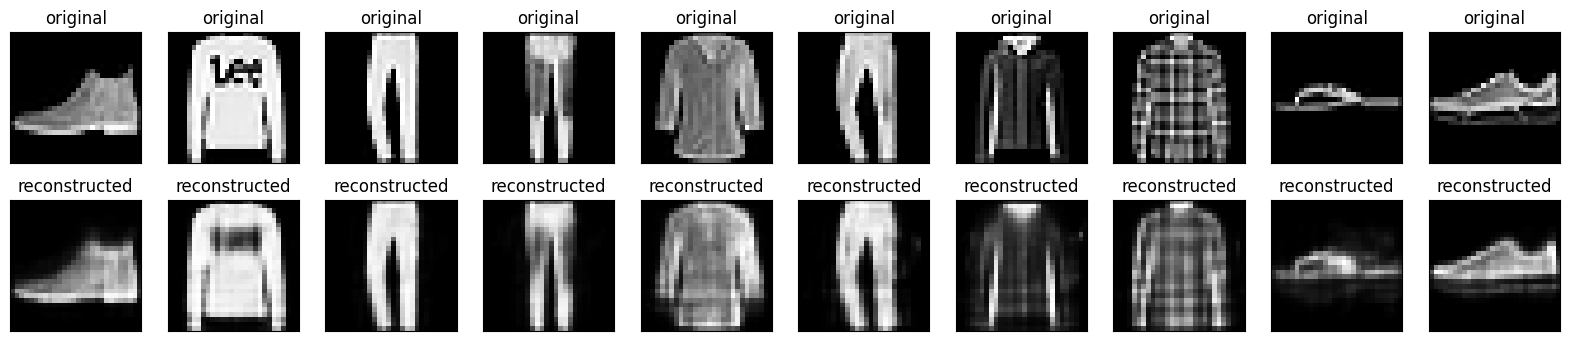

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Second example: Image denoising


![Image denoising results](images/image_denoise_fmnist_results.png)

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Adding random noise to the images

In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


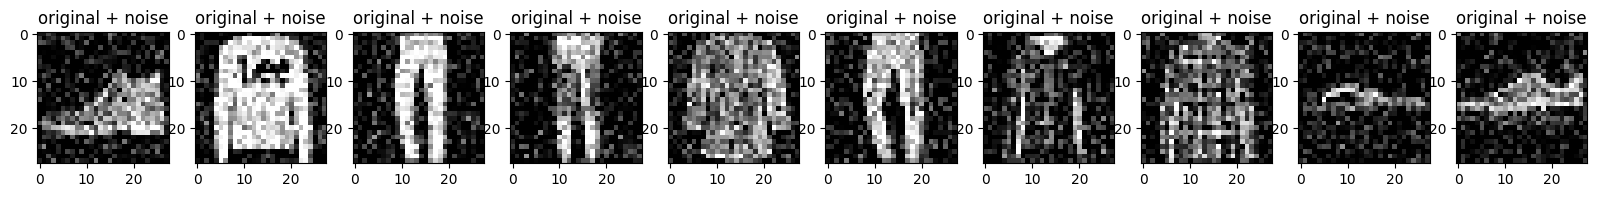

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10



   1/1875 [..............................] - ETA: 3:00:30 - loss: 0.1682


  17/1875 [..............................] - ETA: 6s - loss: 0.1683     


  34/1875 [..............................] - ETA: 5s - loss: 0.1582


  51/1875 [..............................] - ETA: 5s - loss: 0.1401


  68/1875 [>.............................] - ETA: 5s - loss: 0.1241


  85/1875 [>.............................] - ETA: 5s - loss: 0.1114


 102/1875 [>.............................] - ETA: 5s - loss: 0.1013


 119/1875 [>.............................] - ETA: 5s - loss: 0.0931


 136/1875 [=>............................] - ETA: 5s - loss: 0.0866


 153/1875 [=>............................] - ETA: 5s - loss: 0.0810


 170/1875 [=>............................] - ETA: 5s - loss: 0.0762


 187/1875 [=>............................] - ETA: 5s - loss: 0.0718


 204/1875 [==>...........................] - ETA: 5s - loss: 0.0678


 221/1875 [==>...........................] - ETA: 5s - loss: 0.0642


 238/1875 [==>...........................] - ETA: 4s - loss: 0.0609


 255/1875 [===>..........................] - ETA: 4s - loss: 0.0580


 272/1875 [===>..........................] - ETA: 4s - loss: 0.0554


 289/1875 [===>..........................] - ETA: 4s - loss: 0.0531


 306/1875 [===>..........................] - ETA: 4s - loss: 0.0510


 323/1875 [====>.........................] - ETA: 4s - loss: 0.0491


 340/1875 [====>.........................] - ETA: 4s - loss: 0.0474


 357/1875 [====>.........................] - ETA: 4s - loss: 0.0459


 374/1875 [====>.........................] - ETA: 4s - loss: 0.0444


 391/1875 [=====>........................] - ETA: 4s - loss: 0.0431


 408/1875 [=====>........................] - ETA: 4s - loss: 0.0418


 425/1875 [=====>........................] - ETA: 4s - loss: 0.0407


 442/1875 [======>.......................] - ETA: 4s - loss: 0.0397


 459/1875 [======>.......................] - ETA: 4s - loss: 0.0387


 476/1875 [======>.......................] - ETA: 4s - loss: 0.0378


 493/1875 [======>.......................] - ETA: 4s - loss: 0.0369


 510/1875 [=======>......................] - ETA: 4s - loss: 0.0361


 527/1875 [=======>......................] - ETA: 4s - loss: 0.0354


 544/1875 [=======>......................] - ETA: 4s - loss: 0.0347


 561/1875 [=======>......................] - ETA: 4s - loss: 0.0340


 578/1875 [========>.....................] - ETA: 3s - loss: 0.0334


 595/1875 [========>.....................] - ETA: 3s - loss: 0.0328


 612/1875 [========>.....................] - ETA: 3s - loss: 0.0322


 629/1875 [=========>....................] - ETA: 3s - loss: 0.0317


 646/1875 [=========>....................] - ETA: 3s - loss: 0.0312


 663/1875 [=========>....................] - ETA: 3s - loss: 0.0307


 680/1875 [=========>....................] - ETA: 3s - loss: 0.0302


 697/1875 [==========>...................] - ETA: 3s - loss: 0.0298


 714/1875 [==========>...................] - ETA: 3s - loss: 0.0294


 731/1875 [==========>...................] - ETA: 3s - loss: 0.0289


 747/1875 [==========>...................] - ETA: 3s - loss: 0.0286


 764/1875 [===========>..................] - ETA: 3s - loss: 0.0282


 781/1875 [===========>..................] - ETA: 3s - loss: 0.0278


 798/1875 [===========>..................] - ETA: 3s - loss: 0.0275


 815/1875 [============>.................] - ETA: 3s - loss: 0.0271


 832/1875 [============>.................] - ETA: 3s - loss: 0.0268


 849/1875 [============>.................] - ETA: 3s - loss: 0.0265


 866/1875 [============>.................] - ETA: 3s - loss: 0.0262


 883/1875 [=============>................] - ETA: 3s - loss: 0.0259


 900/1875 [=============>................] - ETA: 2s - loss: 0.0256


 917/1875 [=============>................] - ETA: 2s - loss: 0.0254


 934/1875 [=============>................] - ETA: 2s - loss: 0.0251


 951/1875 [==============>...............] - ETA: 2s - loss: 0.0248


 967/1875 [==============>...............] - ETA: 2s - loss: 0.0246


 984/1875 [==============>...............] - ETA: 2s - loss: 0.0244


1001/1875 [===============>..............] - ETA: 2s - loss: 0.0241


1017/1875 [===============>..............] - ETA: 2s - loss: 0.0239


1033/1875 [===============>..............] - ETA: 2s - loss: 0.0237


1050/1875 [===============>..............] - ETA: 2s - loss: 0.0235


1067/1875 [================>.............] - ETA: 2s - loss: 0.0233


1083/1875 [================>.............] - ETA: 2s - loss: 0.0231


1100/1875 [================>.............] - ETA: 2s - loss: 0.0229


1117/1875 [================>.............] - ETA: 2s - loss: 0.0227


1134/1875 [=================>............] - ETA: 2s - loss: 0.0225


1150/1875 [=================>............] - ETA: 2s - loss: 0.0224


1167/1875 [=================>............] - ETA: 2s - loss: 0.0222


1184/1875 [=================>............] - ETA: 2s - loss: 0.0220


1201/1875 [==================>...........] - ETA: 2s - loss: 0.0219


1217/1875 [==================>...........] - ETA: 2s - loss: 0.0217


1233/1875 [==================>...........] - ETA: 1s - loss: 0.0216


1250/1875 [===================>..........] - ETA: 1s - loss: 0.0214


1266/1875 [===================>..........] - ETA: 1s - loss: 0.0213


1282/1875 [===================>..........] - ETA: 1s - loss: 0.0211


1298/1875 [===================>..........] - ETA: 1s - loss: 0.0210


1315/1875 [====================>.........] - ETA: 1s - loss: 0.0209


1332/1875 [====================>.........] - ETA: 1s - loss: 0.0207


1349/1875 [====================>.........] - ETA: 1s - loss: 0.0206


1366/1875 [====================>.........] - ETA: 1s - loss: 0.0205


1383/1875 [=====================>........] - ETA: 1s - loss: 0.0203


1400/1875 [=====================>........] - ETA: 1s - loss: 0.0202


1417/1875 [=====================>........] - ETA: 1s - loss: 0.0201


1434/1875 [=====================>........] - ETA: 1s - loss: 0.0200


1451/1875 [======================>.......] - ETA: 1s - loss: 0.0199


1468/1875 [======================>.......] - ETA: 1s - loss: 0.0197


1485/1875 [======================>.......] - ETA: 1s - loss: 0.0196


1502/1875 [=======================>......] - ETA: 1s - loss: 0.0195


1519/1875 [=======================>......] - ETA: 1s - loss: 0.0194


1536/1875 [=======================>......] - ETA: 1s - loss: 0.0193


1553/1875 [=======================>......] - ETA: 0s - loss: 0.0192


1570/1875 [========================>.....] - ETA: 0s - loss: 0.0191


1586/1875 [========================>.....] - ETA: 0s - loss: 0.0190


1603/1875 [========================>.....] - ETA: 0s - loss: 0.0189


1620/1875 [========================>.....] - ETA: 0s - loss: 0.0188


1637/1875 [=========================>....] - ETA: 0s - loss: 0.0187


1654/1875 [=========================>....] - ETA: 0s - loss: 0.0186


1671/1875 [=========================>....] - ETA: 0s - loss: 0.0185


1688/1875 [==========================>...] - ETA: 0s - loss: 0.0184


1705/1875 [==========================>...] - ETA: 0s - loss: 0.0184


1722/1875 [==========================>...] - ETA: 0s - loss: 0.0183


1739/1875 [==========================>...] - ETA: 0s - loss: 0.0182


1756/1875 [===========================>..] - ETA: 0s - loss: 0.0181


1773/1875 [===========================>..] - ETA: 0s - loss: 0.0180


1790/1875 [===========================>..] - ETA: 0s - loss: 0.0179


1807/1875 [===========================>..] - ETA: 0s - loss: 0.0179


1824/1875 [============================>.] - ETA: 0s - loss: 0.0178


1841/1875 [============================>.] - ETA: 0s - loss: 0.0177


1858/1875 [============================>.] - ETA: 0s - loss: 0.0176


1875/1875 [==============================] - ETA: 0s - loss: 0.0176


1875/1875 [==============================] - 12s 4ms/step - loss: 0.0176 - val_loss: 0.0096


Epoch 2/10



   1/1875 [..............................] - ETA: 7s - loss: 0.0083


  18/1875 [..............................] - ETA: 5s - loss: 0.0094


  35/1875 [..............................] - ETA: 5s - loss: 0.0094


  51/1875 [..............................] - ETA: 5s - loss: 0.0095


  68/1875 [>.............................] - ETA: 5s - loss: 0.0094


  85/1875 [>.............................] - ETA: 5s - loss: 0.0094


 102/1875 [>.............................] - ETA: 5s - loss: 0.0094


 119/1875 [>.............................] - ETA: 5s - loss: 0.0095


 135/1875 [=>............................] - ETA: 5s - loss: 0.0094


 152/1875 [=>............................] - ETA: 5s - loss: 0.0094


 168/1875 [=>............................] - ETA: 5s - loss: 0.0094


 184/1875 [=>............................] - ETA: 5s - loss: 0.0094


 201/1875 [==>...........................] - ETA: 5s - loss: 0.0094


 218/1875 [==>...........................] - ETA: 5s - loss: 0.0094


 235/1875 [==>...........................] - ETA: 5s - loss: 0.0094


 252/1875 [===>..........................] - ETA: 5s - loss: 0.0094


 269/1875 [===>..........................] - ETA: 4s - loss: 0.0094


 286/1875 [===>..........................] - ETA: 4s - loss: 0.0094


 303/1875 [===>..........................] - ETA: 4s - loss: 0.0094


 320/1875 [====>.........................] - ETA: 4s - loss: 0.0094


 337/1875 [====>.........................] - ETA: 4s - loss: 0.0094


 354/1875 [====>.........................] - ETA: 4s - loss: 0.0094


 371/1875 [====>.........................] - ETA: 4s - loss: 0.0094


 388/1875 [=====>........................] - ETA: 4s - loss: 0.0094


 405/1875 [=====>........................] - ETA: 4s - loss: 0.0094


 422/1875 [=====>........................] - ETA: 4s - loss: 0.0094


 439/1875 [======>.......................] - ETA: 4s - loss: 0.0093


 456/1875 [======>.......................] - ETA: 4s - loss: 0.0093


 473/1875 [======>.......................] - ETA: 4s - loss: 0.0093


 489/1875 [======>.......................] - ETA: 4s - loss: 0.0093


 506/1875 [=======>......................] - ETA: 4s - loss: 0.0093


 523/1875 [=======>......................] - ETA: 4s - loss: 0.0093


 540/1875 [=======>......................] - ETA: 4s - loss: 0.0093


 557/1875 [=======>......................] - ETA: 4s - loss: 0.0093


 574/1875 [========>.....................] - ETA: 3s - loss: 0.0093


 590/1875 [========>.....................] - ETA: 3s - loss: 0.0093


 606/1875 [========>.....................] - ETA: 3s - loss: 0.0093


 623/1875 [========>.....................] - ETA: 3s - loss: 0.0093


 640/1875 [=========>....................] - ETA: 3s - loss: 0.0093


 657/1875 [=========>....................] - ETA: 3s - loss: 0.0093


 674/1875 [=========>....................] - ETA: 3s - loss: 0.0093


 691/1875 [==========>...................] - ETA: 3s - loss: 0.0093


 708/1875 [==========>...................] - ETA: 3s - loss: 0.0093


 724/1875 [==========>...................] - ETA: 3s - loss: 0.0093


 741/1875 [==========>...................] - ETA: 3s - loss: 0.0092


 758/1875 [===========>..................] - ETA: 3s - loss: 0.0092


 775/1875 [===========>..................] - ETA: 3s - loss: 0.0092


 792/1875 [===========>..................] - ETA: 3s - loss: 0.0092


 809/1875 [===========>..................] - ETA: 3s - loss: 0.0092


 826/1875 [============>.................] - ETA: 3s - loss: 0.0092


 843/1875 [============>.................] - ETA: 3s - loss: 0.0092


 860/1875 [============>.................] - ETA: 3s - loss: 0.0092


 877/1875 [=============>................] - ETA: 3s - loss: 0.0092


 894/1875 [=============>................] - ETA: 3s - loss: 0.0092


 911/1875 [=============>................] - ETA: 2s - loss: 0.0092


 928/1875 [=============>................] - ETA: 2s - loss: 0.0092


 945/1875 [==============>...............] - ETA: 2s - loss: 0.0092


 962/1875 [==============>...............] - ETA: 2s - loss: 0.0092


 979/1875 [==============>...............] - ETA: 2s - loss: 0.0092


 996/1875 [==============>...............] - ETA: 2s - loss: 0.0092


1013/1875 [===============>..............] - ETA: 2s - loss: 0.0092


1030/1875 [===============>..............] - ETA: 2s - loss: 0.0092


1047/1875 [===============>..............] - ETA: 2s - loss: 0.0092


1064/1875 [================>.............] - ETA: 2s - loss: 0.0092


1081/1875 [================>.............] - ETA: 2s - loss: 0.0092


1098/1875 [================>.............] - ETA: 2s - loss: 0.0092


1114/1875 [================>.............] - ETA: 2s - loss: 0.0091


1131/1875 [=================>............] - ETA: 2s - loss: 0.0091


1148/1875 [=================>............] - ETA: 2s - loss: 0.0091


1165/1875 [=================>............] - ETA: 2s - loss: 0.0091


1182/1875 [=================>............] - ETA: 2s - loss: 0.0091


1198/1875 [==================>...........] - ETA: 2s - loss: 0.0091


1215/1875 [==================>...........] - ETA: 2s - loss: 0.0091


1232/1875 [==================>...........] - ETA: 1s - loss: 0.0091


1249/1875 [==================>...........] - ETA: 1s - loss: 0.0091


1266/1875 [===================>..........] - ETA: 1s - loss: 0.0091


1283/1875 [===================>..........] - ETA: 1s - loss: 0.0091


1300/1875 [===================>..........] - ETA: 1s - loss: 0.0091


1317/1875 [====================>.........] - ETA: 1s - loss: 0.0091


1333/1875 [====================>.........] - ETA: 1s - loss: 0.0091


1350/1875 [====================>.........] - ETA: 1s - loss: 0.0091


1367/1875 [====================>.........] - ETA: 1s - loss: 0.0091


1384/1875 [=====================>........] - ETA: 1s - loss: 0.0091


1401/1875 [=====================>........] - ETA: 1s - loss: 0.0091


1418/1875 [=====================>........] - ETA: 1s - loss: 0.0091


1435/1875 [=====================>........] - ETA: 1s - loss: 0.0090


1452/1875 [======================>.......] - ETA: 1s - loss: 0.0090


1469/1875 [======================>.......] - ETA: 1s - loss: 0.0090


1486/1875 [======================>.......] - ETA: 1s - loss: 0.0090


1503/1875 [=======================>......] - ETA: 1s - loss: 0.0090


1520/1875 [=======================>......] - ETA: 1s - loss: 0.0090


1537/1875 [=======================>......] - ETA: 1s - loss: 0.0090


1554/1875 [=======================>......] - ETA: 0s - loss: 0.0090


1571/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1588/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1605/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1622/1875 [========================>.....] - ETA: 0s - loss: 0.0090


1639/1875 [=========================>....] - ETA: 0s - loss: 0.0090


1656/1875 [=========================>....] - ETA: 0s - loss: 0.0090


1672/1875 [=========================>....] - ETA: 0s - loss: 0.0090


1689/1875 [==========================>...] - ETA: 0s - loss: 0.0090


1706/1875 [==========================>...] - ETA: 0s - loss: 0.0090


1722/1875 [==========================>...] - ETA: 0s - loss: 0.0090


1738/1875 [==========================>...] - ETA: 0s - loss: 0.0090


1755/1875 [===========================>..] - ETA: 0s - loss: 0.0090


1772/1875 [===========================>..] - ETA: 0s - loss: 0.0090


1789/1875 [===========================>..] - ETA: 0s - loss: 0.0090


1806/1875 [===========================>..] - ETA: 0s - loss: 0.0090


1823/1875 [============================>.] - ETA: 0s - loss: 0.0090


1840/1875 [============================>.] - ETA: 0s - loss: 0.0090


1856/1875 [============================>.] - ETA: 0s - loss: 0.0090


1873/1875 [============================>.] - ETA: 0s - loss: 0.0090


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0086


Epoch 3/10



   1/1875 [..............................] - ETA: 7s - loss: 0.0083


  18/1875 [..............................] - ETA: 5s - loss: 0.0083


  35/1875 [..............................] - ETA: 5s - loss: 0.0084


  52/1875 [..............................] - ETA: 5s - loss: 0.0085


  69/1875 [>.............................] - ETA: 5s - loss: 0.0085


  86/1875 [>.............................] - ETA: 5s - loss: 0.0085


 103/1875 [>.............................] - ETA: 5s - loss: 0.0085


 119/1875 [>.............................] - ETA: 5s - loss: 0.0085


 135/1875 [=>............................] - ETA: 5s - loss: 0.0085


 151/1875 [=>............................] - ETA: 5s - loss: 0.0085


 167/1875 [=>............................] - ETA: 5s - loss: 0.0085


 183/1875 [=>............................] - ETA: 5s - loss: 0.0085


 199/1875 [==>...........................] - ETA: 5s - loss: 0.0085


 215/1875 [==>...........................] - ETA: 5s - loss: 0.0085


 231/1875 [==>...........................] - ETA: 5s - loss: 0.0085


 247/1875 [==>...........................] - ETA: 5s - loss: 0.0085


 263/1875 [===>..........................] - ETA: 5s - loss: 0.0085


 279/1875 [===>..........................] - ETA: 5s - loss: 0.0085


 295/1875 [===>..........................] - ETA: 4s - loss: 0.0085


 311/1875 [===>..........................] - ETA: 4s - loss: 0.0085


 328/1875 [====>.........................] - ETA: 4s - loss: 0.0085


 344/1875 [====>.........................] - ETA: 4s - loss: 0.0085


 360/1875 [====>.........................] - ETA: 4s - loss: 0.0085


 376/1875 [=====>........................] - ETA: 4s - loss: 0.0085


 392/1875 [=====>........................] - ETA: 4s - loss: 0.0085


 408/1875 [=====>........................] - ETA: 4s - loss: 0.0085


 424/1875 [=====>........................] - ETA: 4s - loss: 0.0085


 440/1875 [======>.......................] - ETA: 4s - loss: 0.0085


 457/1875 [======>.......................] - ETA: 4s - loss: 0.0085


 474/1875 [======>.......................] - ETA: 4s - loss: 0.0085


 490/1875 [======>.......................] - ETA: 4s - loss: 0.0085


 507/1875 [=======>......................] - ETA: 4s - loss: 0.0085


 524/1875 [=======>......................] - ETA: 4s - loss: 0.0085


 540/1875 [=======>......................] - ETA: 4s - loss: 0.0085


 557/1875 [=======>......................] - ETA: 4s - loss: 0.0085


 573/1875 [========>.....................] - ETA: 4s - loss: 0.0085


 590/1875 [========>.....................] - ETA: 4s - loss: 0.0085


 606/1875 [========>.....................] - ETA: 3s - loss: 0.0085


 622/1875 [========>.....................] - ETA: 3s - loss: 0.0085


 638/1875 [=========>....................] - ETA: 3s - loss: 0.0085


 654/1875 [=========>....................] - ETA: 3s - loss: 0.0085


 670/1875 [=========>....................] - ETA: 3s - loss: 0.0085


 686/1875 [=========>....................] - ETA: 3s - loss: 0.0085


 702/1875 [==========>...................] - ETA: 3s - loss: 0.0085


 718/1875 [==========>...................] - ETA: 3s - loss: 0.0085


 734/1875 [==========>...................] - ETA: 3s - loss: 0.0085


 750/1875 [===========>..................] - ETA: 3s - loss: 0.0085


 766/1875 [===========>..................] - ETA: 3s - loss: 0.0085


 782/1875 [===========>..................] - ETA: 3s - loss: 0.0085


 798/1875 [===========>..................] - ETA: 3s - loss: 0.0085


 814/1875 [============>.................] - ETA: 3s - loss: 0.0084


 830/1875 [============>.................] - ETA: 3s - loss: 0.0084


 847/1875 [============>.................] - ETA: 3s - loss: 0.0084


 864/1875 [============>.................] - ETA: 3s - loss: 0.0084


 880/1875 [=============>................] - ETA: 3s - loss: 0.0084


 897/1875 [=============>................] - ETA: 3s - loss: 0.0084


 913/1875 [=============>................] - ETA: 3s - loss: 0.0084


 929/1875 [=============>................] - ETA: 2s - loss: 0.0084


 945/1875 [==============>...............] - ETA: 2s - loss: 0.0084


 961/1875 [==============>...............] - ETA: 2s - loss: 0.0084


 977/1875 [==============>...............] - ETA: 2s - loss: 0.0084


 993/1875 [==============>...............] - ETA: 2s - loss: 0.0084


1010/1875 [===============>..............] - ETA: 2s - loss: 0.0084


1026/1875 [===============>..............] - ETA: 2s - loss: 0.0084


1043/1875 [===============>..............] - ETA: 2s - loss: 0.0084


1060/1875 [===============>..............] - ETA: 2s - loss: 0.0084


1077/1875 [================>.............] - ETA: 2s - loss: 0.0084


1094/1875 [================>.............] - ETA: 2s - loss: 0.0084


1111/1875 [================>.............] - ETA: 2s - loss: 0.0084


1128/1875 [=================>............] - ETA: 2s - loss: 0.0084


1145/1875 [=================>............] - ETA: 2s - loss: 0.0084


1162/1875 [=================>............] - ETA: 2s - loss: 0.0084


1179/1875 [=================>............] - ETA: 2s - loss: 0.0084


1195/1875 [==================>...........] - ETA: 2s - loss: 0.0084


1212/1875 [==================>...........] - ETA: 2s - loss: 0.0084


1228/1875 [==================>...........] - ETA: 2s - loss: 0.0084


1244/1875 [==================>...........] - ETA: 1s - loss: 0.0084


1260/1875 [===================>..........] - ETA: 1s - loss: 0.0084


1276/1875 [===================>..........] - ETA: 1s - loss: 0.0084


1292/1875 [===================>..........] - ETA: 1s - loss: 0.0084


1308/1875 [===================>..........] - ETA: 1s - loss: 0.0084


1325/1875 [====================>.........] - ETA: 1s - loss: 0.0084


1342/1875 [====================>.........] - ETA: 1s - loss: 0.0084


1359/1875 [====================>.........] - ETA: 1s - loss: 0.0084


1376/1875 [=====================>........] - ETA: 1s - loss: 0.0084


1393/1875 [=====================>........] - ETA: 1s - loss: 0.0084


1410/1875 [=====================>........] - ETA: 1s - loss: 0.0084


1426/1875 [=====================>........] - ETA: 1s - loss: 0.0084


1442/1875 [======================>.......] - ETA: 1s - loss: 0.0084


1459/1875 [======================>.......] - ETA: 1s - loss: 0.0084


1476/1875 [======================>.......] - ETA: 1s - loss: 0.0084


1493/1875 [======================>.......] - ETA: 1s - loss: 0.0084


1509/1875 [=======================>......] - ETA: 1s - loss: 0.0084


1525/1875 [=======================>......] - ETA: 1s - loss: 0.0084


1542/1875 [=======================>......] - ETA: 1s - loss: 0.0084


1558/1875 [=======================>......] - ETA: 0s - loss: 0.0084


1574/1875 [========================>.....] - ETA: 0s - loss: 0.0084


1590/1875 [========================>.....] - ETA: 0s - loss: 0.0084


1607/1875 [========================>.....] - ETA: 0s - loss: 0.0084


1623/1875 [========================>.....] - ETA: 0s - loss: 0.0084


1640/1875 [=========================>....] - ETA: 0s - loss: 0.0084


1656/1875 [=========================>....] - ETA: 0s - loss: 0.0083


1672/1875 [=========================>....] - ETA: 0s - loss: 0.0083


1688/1875 [==========================>...] - ETA: 0s - loss: 0.0083


1704/1875 [==========================>...] - ETA: 0s - loss: 0.0083


1720/1875 [==========================>...] - ETA: 0s - loss: 0.0083


1736/1875 [==========================>...] - ETA: 0s - loss: 0.0083


1752/1875 [===========================>..] - ETA: 0s - loss: 0.0083


1768/1875 [===========================>..] - ETA: 0s - loss: 0.0083


1785/1875 [===========================>..] - ETA: 0s - loss: 0.0083


1802/1875 [===========================>..] - ETA: 0s - loss: 0.0083


1819/1875 [============================>.] - ETA: 0s - loss: 0.0083


1835/1875 [============================>.] - ETA: 0s - loss: 0.0083


1851/1875 [============================>.] - ETA: 0s - loss: 0.0083


1867/1875 [============================>.] - ETA: 0s - loss: 0.0083


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0083 - val_loss: 0.0081


Epoch 4/10



   1/1875 [..............................] - ETA: 7s - loss: 0.0089


  17/1875 [..............................] - ETA: 5s - loss: 0.0082


  34/1875 [..............................] - ETA: 5s - loss: 0.0080


  51/1875 [..............................] - ETA: 5s - loss: 0.0081


  68/1875 [>.............................] - ETA: 5s - loss: 0.0082


  85/1875 [>.............................] - ETA: 5s - loss: 0.0082


 102/1875 [>.............................] - ETA: 5s - loss: 0.0081


 119/1875 [>.............................] - ETA: 5s - loss: 0.0081


 136/1875 [=>............................] - ETA: 5s - loss: 0.0081


 153/1875 [=>............................] - ETA: 5s - loss: 0.0081


 170/1875 [=>............................] - ETA: 5s - loss: 0.0081


 187/1875 [=>............................] - ETA: 5s - loss: 0.0081


 204/1875 [==>...........................] - ETA: 5s - loss: 0.0081


 221/1875 [==>...........................] - ETA: 5s - loss: 0.0081


 238/1875 [==>...........................] - ETA: 4s - loss: 0.0081


 254/1875 [===>..........................] - ETA: 4s - loss: 0.0081


 271/1875 [===>..........................] - ETA: 4s - loss: 0.0081


 288/1875 [===>..........................] - ETA: 4s - loss: 0.0081


 305/1875 [===>..........................] - ETA: 4s - loss: 0.0081


 322/1875 [====>.........................] - ETA: 4s - loss: 0.0081


 339/1875 [====>.........................] - ETA: 4s - loss: 0.0081


 356/1875 [====>.........................] - ETA: 4s - loss: 0.0081


 373/1875 [====>.........................] - ETA: 4s - loss: 0.0081


 390/1875 [=====>........................] - ETA: 4s - loss: 0.0081


 407/1875 [=====>........................] - ETA: 4s - loss: 0.0081


 423/1875 [=====>........................] - ETA: 4s - loss: 0.0081


 439/1875 [======>.......................] - ETA: 4s - loss: 0.0081


 456/1875 [======>.......................] - ETA: 4s - loss: 0.0081


 472/1875 [======>.......................] - ETA: 4s - loss: 0.0081


 489/1875 [======>.......................] - ETA: 4s - loss: 0.0081


 506/1875 [=======>......................] - ETA: 4s - loss: 0.0081


 523/1875 [=======>......................] - ETA: 4s - loss: 0.0081


 540/1875 [=======>......................] - ETA: 4s - loss: 0.0081


 556/1875 [=======>......................] - ETA: 4s - loss: 0.0081


 573/1875 [========>.....................] - ETA: 3s - loss: 0.0081


 589/1875 [========>.....................] - ETA: 3s - loss: 0.0081


 605/1875 [========>.....................] - ETA: 3s - loss: 0.0081


 622/1875 [========>.....................] - ETA: 3s - loss: 0.0081


 639/1875 [=========>....................] - ETA: 3s - loss: 0.0081


 656/1875 [=========>....................] - ETA: 3s - loss: 0.0081


 673/1875 [=========>....................] - ETA: 3s - loss: 0.0081


 690/1875 [==========>...................] - ETA: 3s - loss: 0.0081


 707/1875 [==========>...................] - ETA: 3s - loss: 0.0081


 724/1875 [==========>...................] - ETA: 3s - loss: 0.0081


 741/1875 [==========>...................] - ETA: 3s - loss: 0.0081


 758/1875 [===========>..................] - ETA: 3s - loss: 0.0081


 775/1875 [===========>..................] - ETA: 3s - loss: 0.0081


 792/1875 [===========>..................] - ETA: 3s - loss: 0.0080


 808/1875 [===========>..................] - ETA: 3s - loss: 0.0081


 825/1875 [============>.................] - ETA: 3s - loss: 0.0081


 842/1875 [============>.................] - ETA: 3s - loss: 0.0081


 859/1875 [============>.................] - ETA: 3s - loss: 0.0081


 876/1875 [=============>................] - ETA: 3s - loss: 0.0080


 894/1875 [=============>................] - ETA: 2s - loss: 0.0080


 911/1875 [=============>................] - ETA: 2s - loss: 0.0081


 928/1875 [=============>................] - ETA: 2s - loss: 0.0080


 946/1875 [==============>...............] - ETA: 2s - loss: 0.0080


 963/1875 [==============>...............] - ETA: 2s - loss: 0.0081


 980/1875 [==============>...............] - ETA: 2s - loss: 0.0081


 997/1875 [==============>...............] - ETA: 2s - loss: 0.0081


1014/1875 [===============>..............] - ETA: 2s - loss: 0.0080


1031/1875 [===============>..............] - ETA: 2s - loss: 0.0080


1048/1875 [===============>..............] - ETA: 2s - loss: 0.0080


1065/1875 [================>.............] - ETA: 2s - loss: 0.0080


1082/1875 [================>.............] - ETA: 2s - loss: 0.0080


1099/1875 [================>.............] - ETA: 2s - loss: 0.0080


1116/1875 [================>.............] - ETA: 2s - loss: 0.0080


1133/1875 [=================>............] - ETA: 2s - loss: 0.0080


1150/1875 [=================>............] - ETA: 2s - loss: 0.0080


1167/1875 [=================>............] - ETA: 2s - loss: 0.0080


1184/1875 [=================>............] - ETA: 2s - loss: 0.0080


1201/1875 [==================>...........] - ETA: 2s - loss: 0.0080


1218/1875 [==================>...........] - ETA: 2s - loss: 0.0080


1234/1875 [==================>...........] - ETA: 1s - loss: 0.0080


1251/1875 [===================>..........] - ETA: 1s - loss: 0.0080


1268/1875 [===================>..........] - ETA: 1s - loss: 0.0080


1285/1875 [===================>..........] - ETA: 1s - loss: 0.0080


1302/1875 [===================>..........] - ETA: 1s - loss: 0.0080


1318/1875 [====================>.........] - ETA: 1s - loss: 0.0080


1335/1875 [====================>.........] - ETA: 1s - loss: 0.0080


1352/1875 [====================>.........] - ETA: 1s - loss: 0.0080


1369/1875 [====================>.........] - ETA: 1s - loss: 0.0080


1386/1875 [=====================>........] - ETA: 1s - loss: 0.0080


1403/1875 [=====================>........] - ETA: 1s - loss: 0.0080


1420/1875 [=====================>........] - ETA: 1s - loss: 0.0080


1437/1875 [=====================>........] - ETA: 1s - loss: 0.0080


1454/1875 [======================>.......] - ETA: 1s - loss: 0.0080


1471/1875 [======================>.......] - ETA: 1s - loss: 0.0080


1488/1875 [======================>.......] - ETA: 1s - loss: 0.0080


1505/1875 [=======================>......] - ETA: 1s - loss: 0.0080


1522/1875 [=======================>......] - ETA: 1s - loss: 0.0080


1539/1875 [=======================>......] - ETA: 1s - loss: 0.0080


1556/1875 [=======================>......] - ETA: 0s - loss: 0.0080


1573/1875 [========================>.....] - ETA: 0s - loss: 0.0080


1590/1875 [========================>.....] - ETA: 0s - loss: 0.0080


1607/1875 [========================>.....] - ETA: 0s - loss: 0.0080


1624/1875 [========================>.....] - ETA: 0s - loss: 0.0080


1641/1875 [=========================>....] - ETA: 0s - loss: 0.0080


1658/1875 [=========================>....] - ETA: 0s - loss: 0.0080


1675/1875 [=========================>....] - ETA: 0s - loss: 0.0080


1692/1875 [==========================>...] - ETA: 0s - loss: 0.0080


1709/1875 [==========================>...] - ETA: 0s - loss: 0.0080


1726/1875 [==========================>...] - ETA: 0s - loss: 0.0080


1743/1875 [==========================>...] - ETA: 0s - loss: 0.0080


1760/1875 [===========================>..] - ETA: 0s - loss: 0.0080


1777/1875 [===========================>..] - ETA: 0s - loss: 0.0080


1794/1875 [===========================>..] - ETA: 0s - loss: 0.0080


1811/1875 [===========================>..] - ETA: 0s - loss: 0.0080


1828/1875 [============================>.] - ETA: 0s - loss: 0.0080


1845/1875 [============================>.] - ETA: 0s - loss: 0.0080


1862/1875 [============================>.] - ETA: 0s - loss: 0.0080


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - val_loss: 0.0079


Epoch 5/10



   1/1875 [..............................] - ETA: 7s - loss: 0.0080


  18/1875 [..............................] - ETA: 5s - loss: 0.0080


  35/1875 [..............................] - ETA: 5s - loss: 0.0079


  51/1875 [..............................] - ETA: 5s - loss: 0.0078


  67/1875 [>.............................] - ETA: 5s - loss: 0.0079


  84/1875 [>.............................] - ETA: 5s - loss: 0.0079


 101/1875 [>.............................] - ETA: 5s - loss: 0.0079


 118/1875 [>.............................] - ETA: 5s - loss: 0.0079


 135/1875 [=>............................] - ETA: 5s - loss: 0.0079


 152/1875 [=>............................] - ETA: 5s - loss: 0.0079


 169/1875 [=>............................] - ETA: 5s - loss: 0.0079


 186/1875 [=>............................] - ETA: 5s - loss: 0.0079


 203/1875 [==>...........................] - ETA: 5s - loss: 0.0079


 220/1875 [==>...........................] - ETA: 5s - loss: 0.0079


 237/1875 [==>...........................] - ETA: 5s - loss: 0.0079


 254/1875 [===>..........................] - ETA: 4s - loss: 0.0079


 271/1875 [===>..........................] - ETA: 4s - loss: 0.0079


 287/1875 [===>..........................] - ETA: 4s - loss: 0.0079


 304/1875 [===>..........................] - ETA: 4s - loss: 0.0079


 321/1875 [====>.........................] - ETA: 4s - loss: 0.0079


 338/1875 [====>.........................] - ETA: 4s - loss: 0.0079


 355/1875 [====>.........................] - ETA: 4s - loss: 0.0079


 372/1875 [====>.........................] - ETA: 4s - loss: 0.0079


 389/1875 [=====>........................] - ETA: 4s - loss: 0.0079


 406/1875 [=====>........................] - ETA: 4s - loss: 0.0079


 423/1875 [=====>........................] - ETA: 4s - loss: 0.0079


 440/1875 [======>.......................] - ETA: 4s - loss: 0.0079


 457/1875 [======>.......................] - ETA: 4s - loss: 0.0079


 474/1875 [======>.......................] - ETA: 4s - loss: 0.0079


 491/1875 [======>.......................] - ETA: 4s - loss: 0.0079


 508/1875 [=======>......................] - ETA: 4s - loss: 0.0079


 525/1875 [=======>......................] - ETA: 4s - loss: 0.0079


 542/1875 [=======>......................] - ETA: 4s - loss: 0.0079


 559/1875 [=======>......................] - ETA: 4s - loss: 0.0079


 576/1875 [========>.....................] - ETA: 3s - loss: 0.0079


 593/1875 [========>.....................] - ETA: 3s - loss: 0.0079


 610/1875 [========>.....................] - ETA: 3s - loss: 0.0079


 627/1875 [=========>....................] - ETA: 3s - loss: 0.0079


 644/1875 [=========>....................] - ETA: 3s - loss: 0.0079


 661/1875 [=========>....................] - ETA: 3s - loss: 0.0079


 677/1875 [=========>....................] - ETA: 3s - loss: 0.0079


 694/1875 [==========>...................] - ETA: 3s - loss: 0.0079


 711/1875 [==========>...................] - ETA: 3s - loss: 0.0079


 727/1875 [==========>...................] - ETA: 3s - loss: 0.0079


 744/1875 [==========>...................] - ETA: 3s - loss: 0.0079


 761/1875 [===========>..................] - ETA: 3s - loss: 0.0079


 778/1875 [===========>..................] - ETA: 3s - loss: 0.0079


 795/1875 [===========>..................] - ETA: 3s - loss: 0.0078


 812/1875 [===========>..................] - ETA: 3s - loss: 0.0078


 829/1875 [============>.................] - ETA: 3s - loss: 0.0078


 846/1875 [============>.................] - ETA: 3s - loss: 0.0078


 863/1875 [============>.................] - ETA: 3s - loss: 0.0078


 880/1875 [=============>................] - ETA: 3s - loss: 0.0078


 897/1875 [=============>................] - ETA: 2s - loss: 0.0078


 914/1875 [=============>................] - ETA: 2s - loss: 0.0078


 931/1875 [=============>................] - ETA: 2s - loss: 0.0078


 948/1875 [==============>...............] - ETA: 2s - loss: 0.0078


 966/1875 [==============>...............] - ETA: 2s - loss: 0.0078


 984/1875 [==============>...............] - ETA: 2s - loss: 0.0078


1001/1875 [===============>..............] - ETA: 2s - loss: 0.0078


1018/1875 [===============>..............] - ETA: 2s - loss: 0.0078


1035/1875 [===============>..............] - ETA: 2s - loss: 0.0078


1052/1875 [===============>..............] - ETA: 2s - loss: 0.0078


1069/1875 [================>.............] - ETA: 2s - loss: 0.0078


1087/1875 [================>.............] - ETA: 2s - loss: 0.0078


1104/1875 [================>.............] - ETA: 2s - loss: 0.0078


1121/1875 [================>.............] - ETA: 2s - loss: 0.0078


1138/1875 [=================>............] - ETA: 2s - loss: 0.0078


1155/1875 [=================>............] - ETA: 2s - loss: 0.0078


1173/1875 [=================>............] - ETA: 2s - loss: 0.0078


1191/1875 [==================>...........] - ETA: 2s - loss: 0.0078


1209/1875 [==================>...........] - ETA: 2s - loss: 0.0078


1226/1875 [==================>...........] - ETA: 1s - loss: 0.0078


1243/1875 [==================>...........] - ETA: 1s - loss: 0.0078


1260/1875 [===================>..........] - ETA: 1s - loss: 0.0078


1277/1875 [===================>..........] - ETA: 1s - loss: 0.0078


1294/1875 [===================>..........] - ETA: 1s - loss: 0.0078


1311/1875 [===================>..........] - ETA: 1s - loss: 0.0078


1328/1875 [====================>.........] - ETA: 1s - loss: 0.0078


1345/1875 [====================>.........] - ETA: 1s - loss: 0.0078


1361/1875 [====================>.........] - ETA: 1s - loss: 0.0078


1377/1875 [=====================>........] - ETA: 1s - loss: 0.0078


1394/1875 [=====================>........] - ETA: 1s - loss: 0.0078


1411/1875 [=====================>........] - ETA: 1s - loss: 0.0078


1428/1875 [=====================>........] - ETA: 1s - loss: 0.0078


1445/1875 [======================>.......] - ETA: 1s - loss: 0.0078


1462/1875 [======================>.......] - ETA: 1s - loss: 0.0078


1479/1875 [======================>.......] - ETA: 1s - loss: 0.0078


1496/1875 [======================>.......] - ETA: 1s - loss: 0.0078


1513/1875 [=======================>......] - ETA: 1s - loss: 0.0078


1530/1875 [=======================>......] - ETA: 1s - loss: 0.0078


1548/1875 [=======================>......] - ETA: 0s - loss: 0.0078


1565/1875 [========================>.....] - ETA: 0s - loss: 0.0078


1582/1875 [========================>.....] - ETA: 0s - loss: 0.0078


1599/1875 [========================>.....] - ETA: 0s - loss: 0.0078


1616/1875 [========================>.....] - ETA: 0s - loss: 0.0078


1632/1875 [=========================>....] - ETA: 0s - loss: 0.0078


1649/1875 [=========================>....] - ETA: 0s - loss: 0.0078


1666/1875 [=========================>....] - ETA: 0s - loss: 0.0078


1683/1875 [=========================>....] - ETA: 0s - loss: 0.0078


1700/1875 [==========================>...] - ETA: 0s - loss: 0.0078


1717/1875 [==========================>...] - ETA: 0s - loss: 0.0078


1733/1875 [==========================>...] - ETA: 0s - loss: 0.0078


1750/1875 [===========================>..] - ETA: 0s - loss: 0.0078


1767/1875 [===========================>..] - ETA: 0s - loss: 0.0078


1784/1875 [===========================>..] - ETA: 0s - loss: 0.0078


1801/1875 [===========================>..] - ETA: 0s - loss: 0.0078


1818/1875 [============================>.] - ETA: 0s - loss: 0.0078


1835/1875 [============================>.] - ETA: 0s - loss: 0.0078


1852/1875 [============================>.] - ETA: 0s - loss: 0.0078


1869/1875 [============================>.] - ETA: 0s - loss: 0.0078


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0078 - val_loss: 0.0078


Epoch 6/10



   1/1875 [..............................] - ETA: 8s - loss: 0.0078


  18/1875 [..............................] - ETA: 5s - loss: 0.0078


  35/1875 [..............................] - ETA: 5s - loss: 0.0078


  52/1875 [..............................] - ETA: 5s - loss: 0.0077


  69/1875 [>.............................] - ETA: 5s - loss: 0.0077


  86/1875 [>.............................] - ETA: 5s - loss: 0.0077


 103/1875 [>.............................] - ETA: 5s - loss: 0.0077


 120/1875 [>.............................] - ETA: 5s - loss: 0.0077


 137/1875 [=>............................] - ETA: 5s - loss: 0.0077


 154/1875 [=>............................] - ETA: 5s - loss: 0.0077


 171/1875 [=>............................] - ETA: 5s - loss: 0.0077


 188/1875 [==>...........................] - ETA: 5s - loss: 0.0077


 205/1875 [==>...........................] - ETA: 5s - loss: 0.0077


 222/1875 [==>...........................] - ETA: 4s - loss: 0.0077


 239/1875 [==>...........................] - ETA: 4s - loss: 0.0076


 256/1875 [===>..........................] - ETA: 4s - loss: 0.0076


 273/1875 [===>..........................] - ETA: 4s - loss: 0.0077


 290/1875 [===>..........................] - ETA: 4s - loss: 0.0077


 307/1875 [===>..........................] - ETA: 4s - loss: 0.0076


 324/1875 [====>.........................] - ETA: 4s - loss: 0.0077


 341/1875 [====>.........................] - ETA: 4s - loss: 0.0077


 358/1875 [====>.........................] - ETA: 4s - loss: 0.0077


 375/1875 [=====>........................] - ETA: 4s - loss: 0.0077


 392/1875 [=====>........................] - ETA: 4s - loss: 0.0077


 409/1875 [=====>........................] - ETA: 4s - loss: 0.0077


 426/1875 [=====>........................] - ETA: 4s - loss: 0.0077


 443/1875 [======>.......................] - ETA: 4s - loss: 0.0077


 460/1875 [======>.......................] - ETA: 4s - loss: 0.0077


 477/1875 [======>.......................] - ETA: 4s - loss: 0.0077


 494/1875 [======>.......................] - ETA: 4s - loss: 0.0077


 511/1875 [=======>......................] - ETA: 4s - loss: 0.0077


 528/1875 [=======>......................] - ETA: 4s - loss: 0.0077


 545/1875 [=======>......................] - ETA: 4s - loss: 0.0077


 562/1875 [=======>......................] - ETA: 3s - loss: 0.0077


 579/1875 [========>.....................] - ETA: 3s - loss: 0.0077


 596/1875 [========>.....................] - ETA: 3s - loss: 0.0077


 613/1875 [========>.....................] - ETA: 3s - loss: 0.0077


 629/1875 [=========>....................] - ETA: 3s - loss: 0.0077


 646/1875 [=========>....................] - ETA: 3s - loss: 0.0077


 663/1875 [=========>....................] - ETA: 3s - loss: 0.0077


 680/1875 [=========>....................] - ETA: 3s - loss: 0.0077


 697/1875 [==========>...................] - ETA: 3s - loss: 0.0077


 714/1875 [==========>...................] - ETA: 3s - loss: 0.0077


 731/1875 [==========>...................] - ETA: 3s - loss: 0.0077


 748/1875 [==========>...................] - ETA: 3s - loss: 0.0077


 765/1875 [===========>..................] - ETA: 3s - loss: 0.0077


 782/1875 [===========>..................] - ETA: 3s - loss: 0.0077


 799/1875 [===========>..................] - ETA: 3s - loss: 0.0077


 816/1875 [============>.................] - ETA: 3s - loss: 0.0077


 833/1875 [============>.................] - ETA: 3s - loss: 0.0077


 850/1875 [============>.................] - ETA: 3s - loss: 0.0077


 867/1875 [============>.................] - ETA: 3s - loss: 0.0077


 884/1875 [=============>................] - ETA: 3s - loss: 0.0077


 900/1875 [=============>................] - ETA: 2s - loss: 0.0077


 917/1875 [=============>................] - ETA: 2s - loss: 0.0077


 934/1875 [=============>................] - ETA: 2s - loss: 0.0077


 951/1875 [==============>...............] - ETA: 2s - loss: 0.0077


 968/1875 [==============>...............] - ETA: 2s - loss: 0.0077


 985/1875 [==============>...............] - ETA: 2s - loss: 0.0077


1002/1875 [===============>..............] - ETA: 2s - loss: 0.0077


1019/1875 [===============>..............] - ETA: 2s - loss: 0.0077


1036/1875 [===============>..............] - ETA: 2s - loss: 0.0077


1053/1875 [===============>..............] - ETA: 2s - loss: 0.0077


1070/1875 [================>.............] - ETA: 2s - loss: 0.0077


1087/1875 [================>.............] - ETA: 2s - loss: 0.0077


1104/1875 [================>.............] - ETA: 2s - loss: 0.0077


1121/1875 [================>.............] - ETA: 2s - loss: 0.0077


1138/1875 [=================>............] - ETA: 2s - loss: 0.0077


1155/1875 [=================>............] - ETA: 2s - loss: 0.0077


1172/1875 [=================>............] - ETA: 2s - loss: 0.0077


1189/1875 [==================>...........] - ETA: 2s - loss: 0.0077


1206/1875 [==================>...........] - ETA: 2s - loss: 0.0077


1223/1875 [==================>...........] - ETA: 1s - loss: 0.0077


1240/1875 [==================>...........] - ETA: 1s - loss: 0.0077


1257/1875 [===================>..........] - ETA: 1s - loss: 0.0077


1274/1875 [===================>..........] - ETA: 1s - loss: 0.0077


1291/1875 [===================>..........] - ETA: 1s - loss: 0.0077


1308/1875 [===================>..........] - ETA: 1s - loss: 0.0077


1325/1875 [====================>.........] - ETA: 1s - loss: 0.0077


1342/1875 [====================>.........] - ETA: 1s - loss: 0.0077


1359/1875 [====================>.........] - ETA: 1s - loss: 0.0077


1376/1875 [=====================>........] - ETA: 1s - loss: 0.0077


1393/1875 [=====================>........] - ETA: 1s - loss: 0.0077


1410/1875 [=====================>........] - ETA: 1s - loss: 0.0077


1427/1875 [=====================>........] - ETA: 1s - loss: 0.0077


1444/1875 [======================>.......] - ETA: 1s - loss: 0.0077


1461/1875 [======================>.......] - ETA: 1s - loss: 0.0077


1478/1875 [======================>.......] - ETA: 1s - loss: 0.0077


1495/1875 [======================>.......] - ETA: 1s - loss: 0.0077


1512/1875 [=======================>......] - ETA: 1s - loss: 0.0077


1529/1875 [=======================>......] - ETA: 1s - loss: 0.0077


1546/1875 [=======================>......] - ETA: 0s - loss: 0.0077


1563/1875 [========================>.....] - ETA: 0s - loss: 0.0077


1580/1875 [========================>.....] - ETA: 0s - loss: 0.0077


1597/1875 [========================>.....] - ETA: 0s - loss: 0.0077


1614/1875 [========================>.....] - ETA: 0s - loss: 0.0077


1631/1875 [=========================>....] - ETA: 0s - loss: 0.0077


1648/1875 [=========================>....] - ETA: 0s - loss: 0.0077


1664/1875 [=========================>....] - ETA: 0s - loss: 0.0077


1681/1875 [=========================>....] - ETA: 0s - loss: 0.0077


1698/1875 [==========================>...] - ETA: 0s - loss: 0.0077


1715/1875 [==========================>...] - ETA: 0s - loss: 0.0077


1732/1875 [==========================>...] - ETA: 0s - loss: 0.0077


1749/1875 [==========================>...] - ETA: 0s - loss: 0.0077


1766/1875 [===========================>..] - ETA: 0s - loss: 0.0077


1783/1875 [===========================>..] - ETA: 0s - loss: 0.0077


1800/1875 [===========================>..] - ETA: 0s - loss: 0.0077


1817/1875 [============================>.] - ETA: 0s - loss: 0.0077


1834/1875 [============================>.] - ETA: 0s - loss: 0.0077


1851/1875 [============================>.] - ETA: 0s - loss: 0.0077


1868/1875 [============================>.] - ETA: 0s - loss: 0.0077


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0077 - val_loss: 0.0077


Epoch 7/10



   1/1875 [..............................] - ETA: 7s - loss: 0.0081


  18/1875 [..............................] - ETA: 5s - loss: 0.0075


  35/1875 [..............................] - ETA: 5s - loss: 0.0076


  52/1875 [..............................] - ETA: 5s - loss: 0.0076


  69/1875 [>.............................] - ETA: 5s - loss: 0.0076


  86/1875 [>.............................] - ETA: 5s - loss: 0.0076


 103/1875 [>.............................] - ETA: 5s - loss: 0.0077


 120/1875 [>.............................] - ETA: 5s - loss: 0.0077


 137/1875 [=>............................] - ETA: 5s - loss: 0.0077


 154/1875 [=>............................] - ETA: 5s - loss: 0.0077


 171/1875 [=>............................] - ETA: 5s - loss: 0.0076


 188/1875 [==>...........................] - ETA: 5s - loss: 0.0077


 205/1875 [==>...........................] - ETA: 5s - loss: 0.0077


 222/1875 [==>...........................] - ETA: 5s - loss: 0.0076


 239/1875 [==>...........................] - ETA: 4s - loss: 0.0076


 256/1875 [===>..........................] - ETA: 4s - loss: 0.0077


 273/1875 [===>..........................] - ETA: 4s - loss: 0.0077


 290/1875 [===>..........................] - ETA: 4s - loss: 0.0076


 307/1875 [===>..........................] - ETA: 4s - loss: 0.0077


 324/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 342/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 359/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 376/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 393/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 410/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 427/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 444/1875 [======>.......................] - ETA: 4s - loss: 0.0077


 461/1875 [======>.......................] - ETA: 4s - loss: 0.0077


 478/1875 [======>.......................] - ETA: 4s - loss: 0.0076


 495/1875 [======>.......................] - ETA: 4s - loss: 0.0076


 512/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 529/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 546/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 563/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 580/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 597/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 614/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 631/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 648/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 665/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 682/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 699/1875 [==========>...................] - ETA: 3s - loss: 0.0076


 716/1875 [==========>...................] - ETA: 3s - loss: 0.0076


 733/1875 [==========>...................] - ETA: 3s - loss: 0.0076


 750/1875 [===========>..................] - ETA: 3s - loss: 0.0076


 767/1875 [===========>..................] - ETA: 3s - loss: 0.0076


 784/1875 [===========>..................] - ETA: 3s - loss: 0.0076


 801/1875 [===========>..................] - ETA: 3s - loss: 0.0076


 818/1875 [============>.................] - ETA: 3s - loss: 0.0076


 835/1875 [============>.................] - ETA: 3s - loss: 0.0076


 852/1875 [============>.................] - ETA: 3s - loss: 0.0076


 869/1875 [============>.................] - ETA: 3s - loss: 0.0076


 886/1875 [=============>................] - ETA: 2s - loss: 0.0076


 903/1875 [=============>................] - ETA: 2s - loss: 0.0076


 920/1875 [=============>................] - ETA: 2s - loss: 0.0076


 937/1875 [=============>................] - ETA: 2s - loss: 0.0076


 954/1875 [==============>...............] - ETA: 2s - loss: 0.0076


 971/1875 [==============>...............] - ETA: 2s - loss: 0.0076


 988/1875 [==============>...............] - ETA: 2s - loss: 0.0076


1005/1875 [===============>..............] - ETA: 2s - loss: 0.0076


1022/1875 [===============>..............] - ETA: 2s - loss: 0.0076


1039/1875 [===============>..............] - ETA: 2s - loss: 0.0076


1056/1875 [===============>..............] - ETA: 2s - loss: 0.0076


1073/1875 [================>.............] - ETA: 2s - loss: 0.0076


1090/1875 [================>.............] - ETA: 2s - loss: 0.0076


1107/1875 [================>.............] - ETA: 2s - loss: 0.0076


1124/1875 [================>.............] - ETA: 2s - loss: 0.0076


1141/1875 [=================>............] - ETA: 2s - loss: 0.0076


1158/1875 [=================>............] - ETA: 2s - loss: 0.0076


1175/1875 [=================>............] - ETA: 2s - loss: 0.0076


1192/1875 [==================>...........] - ETA: 2s - loss: 0.0076


1209/1875 [==================>...........] - ETA: 2s - loss: 0.0076


1226/1875 [==================>...........] - ETA: 1s - loss: 0.0076


1243/1875 [==================>...........] - ETA: 1s - loss: 0.0076


1260/1875 [===================>..........] - ETA: 1s - loss: 0.0076


1277/1875 [===================>..........] - ETA: 1s - loss: 0.0076


1294/1875 [===================>..........] - ETA: 1s - loss: 0.0076


1311/1875 [===================>..........] - ETA: 1s - loss: 0.0076


1328/1875 [====================>.........] - ETA: 1s - loss: 0.0076


1345/1875 [====================>.........] - ETA: 1s - loss: 0.0076


1362/1875 [====================>.........] - ETA: 1s - loss: 0.0076


1379/1875 [=====================>........] - ETA: 1s - loss: 0.0076


1396/1875 [=====================>........] - ETA: 1s - loss: 0.0076


1413/1875 [=====================>........] - ETA: 1s - loss: 0.0076


1430/1875 [=====================>........] - ETA: 1s - loss: 0.0076


1447/1875 [======================>.......] - ETA: 1s - loss: 0.0076


1464/1875 [======================>.......] - ETA: 1s - loss: 0.0076


1480/1875 [======================>.......] - ETA: 1s - loss: 0.0076


1497/1875 [======================>.......] - ETA: 1s - loss: 0.0076


1514/1875 [=======================>......] - ETA: 1s - loss: 0.0076


1531/1875 [=======================>......] - ETA: 1s - loss: 0.0076


1547/1875 [=======================>......] - ETA: 0s - loss: 0.0076


1563/1875 [========================>.....] - ETA: 0s - loss: 0.0076


1580/1875 [========================>.....] - ETA: 0s - loss: 0.0076


1597/1875 [========================>.....] - ETA: 0s - loss: 0.0076


1614/1875 [========================>.....] - ETA: 0s - loss: 0.0076


1631/1875 [=========================>....] - ETA: 0s - loss: 0.0076


1648/1875 [=========================>....] - ETA: 0s - loss: 0.0076


1665/1875 [=========================>....] - ETA: 0s - loss: 0.0076


1682/1875 [=========================>....] - ETA: 0s - loss: 0.0076


1699/1875 [==========================>...] - ETA: 0s - loss: 0.0076


1716/1875 [==========================>...] - ETA: 0s - loss: 0.0076


1733/1875 [==========================>...] - ETA: 0s - loss: 0.0076


1750/1875 [===========================>..] - ETA: 0s - loss: 0.0076


1767/1875 [===========================>..] - ETA: 0s - loss: 0.0076


1784/1875 [===========================>..] - ETA: 0s - loss: 0.0076


1801/1875 [===========================>..] - ETA: 0s - loss: 0.0076


1818/1875 [============================>.] - ETA: 0s - loss: 0.0076


1834/1875 [============================>.] - ETA: 0s - loss: 0.0076


1851/1875 [============================>.] - ETA: 0s - loss: 0.0076


1868/1875 [============================>.] - ETA: 0s - loss: 0.0076


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0076 - val_loss: 0.0076


Epoch 8/10



   1/1875 [..............................] - ETA: 7s - loss: 0.0071


  18/1875 [..............................] - ETA: 5s - loss: 0.0076


  35/1875 [..............................] - ETA: 5s - loss: 0.0077


  51/1875 [..............................] - ETA: 5s - loss: 0.0076


  67/1875 [>.............................] - ETA: 5s - loss: 0.0077


  83/1875 [>.............................] - ETA: 5s - loss: 0.0076


  99/1875 [>.............................] - ETA: 5s - loss: 0.0076


 116/1875 [>.............................] - ETA: 5s - loss: 0.0076


 133/1875 [=>............................] - ETA: 5s - loss: 0.0076


 150/1875 [=>............................] - ETA: 5s - loss: 0.0075


 167/1875 [=>............................] - ETA: 5s - loss: 0.0076


 184/1875 [=>............................] - ETA: 5s - loss: 0.0076


 201/1875 [==>...........................] - ETA: 5s - loss: 0.0076


 218/1875 [==>...........................] - ETA: 5s - loss: 0.0076


 235/1875 [==>...........................] - ETA: 5s - loss: 0.0076


 252/1875 [===>..........................] - ETA: 5s - loss: 0.0076


 269/1875 [===>..........................] - ETA: 4s - loss: 0.0076


 286/1875 [===>..........................] - ETA: 4s - loss: 0.0076


 303/1875 [===>..........................] - ETA: 4s - loss: 0.0076


 320/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 337/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 354/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 371/1875 [====>.........................] - ETA: 4s - loss: 0.0076


 388/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 405/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 421/1875 [=====>........................] - ETA: 4s - loss: 0.0076


 438/1875 [======>.......................] - ETA: 4s - loss: 0.0076


 455/1875 [======>.......................] - ETA: 4s - loss: 0.0076


 472/1875 [======>.......................] - ETA: 4s - loss: 0.0076


 489/1875 [======>.......................] - ETA: 4s - loss: 0.0076


 506/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 522/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 539/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 556/1875 [=======>......................] - ETA: 4s - loss: 0.0076


 573/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 590/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 608/1875 [========>.....................] - ETA: 3s - loss: 0.0076


 625/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 642/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 659/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 676/1875 [=========>....................] - ETA: 3s - loss: 0.0076


 693/1875 [==========>...................] - ETA: 3s - loss: 0.0076


 710/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 727/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 743/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 760/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 777/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 793/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 809/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 826/1875 [============>.................] - ETA: 3s - loss: 0.0075


 843/1875 [============>.................] - ETA: 3s - loss: 0.0075


 860/1875 [============>.................] - ETA: 3s - loss: 0.0075


 877/1875 [=============>................] - ETA: 3s - loss: 0.0075


 894/1875 [=============>................] - ETA: 3s - loss: 0.0075


 911/1875 [=============>................] - ETA: 2s - loss: 0.0075


 928/1875 [=============>................] - ETA: 2s - loss: 0.0075


 945/1875 [==============>...............] - ETA: 2s - loss: 0.0075


 962/1875 [==============>...............] - ETA: 2s - loss: 0.0075


 979/1875 [==============>...............] - ETA: 2s - loss: 0.0075


 996/1875 [==============>...............] - ETA: 2s - loss: 0.0075


1013/1875 [===============>..............] - ETA: 2s - loss: 0.0075


1030/1875 [===============>..............] - ETA: 2s - loss: 0.0075


1047/1875 [===============>..............] - ETA: 2s - loss: 0.0075


1064/1875 [================>.............] - ETA: 2s - loss: 0.0075


1081/1875 [================>.............] - ETA: 2s - loss: 0.0075


1098/1875 [================>.............] - ETA: 2s - loss: 0.0075


1115/1875 [================>.............] - ETA: 2s - loss: 0.0075


1132/1875 [=================>............] - ETA: 2s - loss: 0.0075


1149/1875 [=================>............] - ETA: 2s - loss: 0.0075


1166/1875 [=================>............] - ETA: 2s - loss: 0.0075


1182/1875 [=================>............] - ETA: 2s - loss: 0.0075


1199/1875 [==================>...........] - ETA: 2s - loss: 0.0075


1216/1875 [==================>...........] - ETA: 2s - loss: 0.0075


1233/1875 [==================>...........] - ETA: 1s - loss: 0.0075


1250/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1267/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1284/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1301/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1318/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1335/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1352/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1368/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1384/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1400/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1416/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1432/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1448/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1464/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1480/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1496/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1512/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1528/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1544/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1560/1875 [=======================>......] - ETA: 0s - loss: 0.0075


1576/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1592/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1608/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1624/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1641/1875 [=========================>....] - ETA: 0s - loss: 0.0075


1658/1875 [=========================>....] - ETA: 0s - loss: 0.0075


1675/1875 [=========================>....] - ETA: 0s - loss: 0.0075


1692/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1708/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1724/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1740/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1756/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1772/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1788/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1804/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1820/1875 [============================>.] - ETA: 0s - loss: 0.0075


1836/1875 [============================>.] - ETA: 0s - loss: 0.0075


1852/1875 [============================>.] - ETA: 0s - loss: 0.0075


1869/1875 [============================>.] - ETA: 0s - loss: 0.0075


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - val_loss: 0.0076


Epoch 9/10



   1/1875 [..............................] - ETA: 8s - loss: 0.0068


  17/1875 [..............................] - ETA: 5s - loss: 0.0075


  33/1875 [..............................] - ETA: 5s - loss: 0.0075


  49/1875 [..............................] - ETA: 5s - loss: 0.0075


  65/1875 [>.............................] - ETA: 5s - loss: 0.0076


  81/1875 [>.............................] - ETA: 5s - loss: 0.0075


  97/1875 [>.............................] - ETA: 5s - loss: 0.0075


 113/1875 [>.............................] - ETA: 5s - loss: 0.0075


 130/1875 [=>............................] - ETA: 5s - loss: 0.0075


 146/1875 [=>............................] - ETA: 5s - loss: 0.0075


 162/1875 [=>............................] - ETA: 5s - loss: 0.0075


 178/1875 [=>............................] - ETA: 5s - loss: 0.0075


 194/1875 [==>...........................] - ETA: 5s - loss: 0.0075


 210/1875 [==>...........................] - ETA: 5s - loss: 0.0075


 226/1875 [==>...........................] - ETA: 5s - loss: 0.0075


 242/1875 [==>...........................] - ETA: 5s - loss: 0.0075


 258/1875 [===>..........................] - ETA: 5s - loss: 0.0075


 274/1875 [===>..........................] - ETA: 5s - loss: 0.0075


 290/1875 [===>..........................] - ETA: 5s - loss: 0.0075


 306/1875 [===>..........................] - ETA: 4s - loss: 0.0075


 322/1875 [====>.........................] - ETA: 4s - loss: 0.0075


 339/1875 [====>.........................] - ETA: 4s - loss: 0.0075


 355/1875 [====>.........................] - ETA: 4s - loss: 0.0075


 371/1875 [====>.........................] - ETA: 4s - loss: 0.0075


 387/1875 [=====>........................] - ETA: 4s - loss: 0.0075


 403/1875 [=====>........................] - ETA: 4s - loss: 0.0075


 419/1875 [=====>........................] - ETA: 4s - loss: 0.0075


 435/1875 [=====>........................] - ETA: 4s - loss: 0.0075


 452/1875 [======>.......................] - ETA: 4s - loss: 0.0075


 468/1875 [======>.......................] - ETA: 4s - loss: 0.0075


 484/1875 [======>.......................] - ETA: 4s - loss: 0.0075


 500/1875 [=======>......................] - ETA: 4s - loss: 0.0075


 516/1875 [=======>......................] - ETA: 4s - loss: 0.0075


 532/1875 [=======>......................] - ETA: 4s - loss: 0.0075


 548/1875 [=======>......................] - ETA: 4s - loss: 0.0075


 564/1875 [========>.....................] - ETA: 4s - loss: 0.0075


 580/1875 [========>.....................] - ETA: 4s - loss: 0.0075


 596/1875 [========>.....................] - ETA: 4s - loss: 0.0075


 612/1875 [========>.....................] - ETA: 4s - loss: 0.0075


 629/1875 [=========>....................] - ETA: 3s - loss: 0.0075


 646/1875 [=========>....................] - ETA: 3s - loss: 0.0075


 662/1875 [=========>....................] - ETA: 3s - loss: 0.0075


 678/1875 [=========>....................] - ETA: 3s - loss: 0.0075


 694/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 711/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 728/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 744/1875 [==========>...................] - ETA: 3s - loss: 0.0075


 761/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 778/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 795/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 812/1875 [===========>..................] - ETA: 3s - loss: 0.0075


 829/1875 [============>.................] - ETA: 3s - loss: 0.0075


 846/1875 [============>.................] - ETA: 3s - loss: 0.0075


 863/1875 [============>.................] - ETA: 3s - loss: 0.0075


 880/1875 [=============>................] - ETA: 3s - loss: 0.0075


 897/1875 [=============>................] - ETA: 3s - loss: 0.0075


 913/1875 [=============>................] - ETA: 3s - loss: 0.0075


 929/1875 [=============>................] - ETA: 2s - loss: 0.0075


 945/1875 [==============>...............] - ETA: 2s - loss: 0.0075


 962/1875 [==============>...............] - ETA: 2s - loss: 0.0075


 979/1875 [==============>...............] - ETA: 2s - loss: 0.0075


 996/1875 [==============>...............] - ETA: 2s - loss: 0.0075


1013/1875 [===============>..............] - ETA: 2s - loss: 0.0075


1030/1875 [===============>..............] - ETA: 2s - loss: 0.0075


1047/1875 [===============>..............] - ETA: 2s - loss: 0.0075


1064/1875 [================>.............] - ETA: 2s - loss: 0.0075


1081/1875 [================>.............] - ETA: 2s - loss: 0.0075


1098/1875 [================>.............] - ETA: 2s - loss: 0.0075


1115/1875 [================>.............] - ETA: 2s - loss: 0.0075


1132/1875 [=================>............] - ETA: 2s - loss: 0.0075


1149/1875 [=================>............] - ETA: 2s - loss: 0.0075


1165/1875 [=================>............] - ETA: 2s - loss: 0.0075


1181/1875 [=================>............] - ETA: 2s - loss: 0.0075


1197/1875 [==================>...........] - ETA: 2s - loss: 0.0075


1214/1875 [==================>...........] - ETA: 2s - loss: 0.0075


1231/1875 [==================>...........] - ETA: 2s - loss: 0.0075


1247/1875 [==================>...........] - ETA: 1s - loss: 0.0075


1264/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1280/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1297/1875 [===================>..........] - ETA: 1s - loss: 0.0075


1314/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1331/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1348/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1365/1875 [====================>.........] - ETA: 1s - loss: 0.0075


1382/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1399/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1416/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1433/1875 [=====================>........] - ETA: 1s - loss: 0.0075


1450/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1467/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1484/1875 [======================>.......] - ETA: 1s - loss: 0.0075


1501/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1518/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1535/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1551/1875 [=======================>......] - ETA: 1s - loss: 0.0075


1568/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1586/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1603/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1620/1875 [========================>.....] - ETA: 0s - loss: 0.0075


1637/1875 [=========================>....] - ETA: 0s - loss: 0.0075


1654/1875 [=========================>....] - ETA: 0s - loss: 0.0075


1671/1875 [=========================>....] - ETA: 0s - loss: 0.0075


1688/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1705/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1722/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1739/1875 [==========================>...] - ETA: 0s - loss: 0.0075


1756/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1773/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1791/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1808/1875 [===========================>..] - ETA: 0s - loss: 0.0075


1825/1875 [============================>.] - ETA: 0s - loss: 0.0075


1842/1875 [============================>.] - ETA: 0s - loss: 0.0075


1859/1875 [============================>.] - ETA: 0s - loss: 0.0075


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - val_loss: 0.0075


Epoch 10/10



   1/1875 [..............................] - ETA: 8s - loss: 0.0074


  18/1875 [..............................] - ETA: 5s - loss: 0.0073


  35/1875 [..............................] - ETA: 5s - loss: 0.0074


  52/1875 [..............................] - ETA: 5s - loss: 0.0074


  69/1875 [>.............................] - ETA: 5s - loss: 0.0074


  86/1875 [>.............................] - ETA: 5s - loss: 0.0074


 103/1875 [>.............................] - ETA: 5s - loss: 0.0074


 120/1875 [>.............................] - ETA: 5s - loss: 0.0073


 137/1875 [=>............................] - ETA: 5s - loss: 0.0073


 154/1875 [=>............................] - ETA: 5s - loss: 0.0073


 171/1875 [=>............................] - ETA: 5s - loss: 0.0074


 187/1875 [=>............................] - ETA: 5s - loss: 0.0074


 204/1875 [==>...........................] - ETA: 5s - loss: 0.0074


 221/1875 [==>...........................] - ETA: 5s - loss: 0.0074


 238/1875 [==>...........................] - ETA: 5s - loss: 0.0074


 255/1875 [===>..........................] - ETA: 4s - loss: 0.0074


 272/1875 [===>..........................] - ETA: 4s - loss: 0.0074


 289/1875 [===>..........................] - ETA: 4s - loss: 0.0074


 306/1875 [===>..........................] - ETA: 4s - loss: 0.0074


 323/1875 [====>.........................] - ETA: 4s - loss: 0.0074


 340/1875 [====>.........................] - ETA: 4s - loss: 0.0074


 357/1875 [====>.........................] - ETA: 4s - loss: 0.0074


 374/1875 [====>.........................] - ETA: 4s - loss: 0.0074


 391/1875 [=====>........................] - ETA: 4s - loss: 0.0074


 408/1875 [=====>........................] - ETA: 4s - loss: 0.0074


 425/1875 [=====>........................] - ETA: 4s - loss: 0.0074


 442/1875 [======>.......................] - ETA: 4s - loss: 0.0074


 459/1875 [======>.......................] - ETA: 4s - loss: 0.0075


 476/1875 [======>.......................] - ETA: 4s - loss: 0.0075


 493/1875 [======>.......................] - ETA: 4s - loss: 0.0074


 510/1875 [=======>......................] - ETA: 4s - loss: 0.0075


 527/1875 [=======>......................] - ETA: 4s - loss: 0.0074


 544/1875 [=======>......................] - ETA: 4s - loss: 0.0075


 561/1875 [=======>......................] - ETA: 4s - loss: 0.0074


 578/1875 [========>.....................] - ETA: 3s - loss: 0.0074


 595/1875 [========>.....................] - ETA: 3s - loss: 0.0074


 612/1875 [========>.....................] - ETA: 3s - loss: 0.0074


 629/1875 [=========>....................] - ETA: 3s - loss: 0.0074


 646/1875 [=========>....................] - ETA: 3s - loss: 0.0074


 663/1875 [=========>....................] - ETA: 3s - loss: 0.0074


 680/1875 [=========>....................] - ETA: 3s - loss: 0.0074


 697/1875 [==========>...................] - ETA: 3s - loss: 0.0074


 714/1875 [==========>...................] - ETA: 3s - loss: 0.0074


 731/1875 [==========>...................] - ETA: 3s - loss: 0.0074


 748/1875 [==========>...................] - ETA: 3s - loss: 0.0074


 765/1875 [===========>..................] - ETA: 3s - loss: 0.0074


 782/1875 [===========>..................] - ETA: 3s - loss: 0.0074


 799/1875 [===========>..................] - ETA: 3s - loss: 0.0074


 816/1875 [============>.................] - ETA: 3s - loss: 0.0074


 832/1875 [============>.................] - ETA: 3s - loss: 0.0074


 849/1875 [============>.................] - ETA: 3s - loss: 0.0074


 866/1875 [============>.................] - ETA: 3s - loss: 0.0074


 883/1875 [=============>................] - ETA: 3s - loss: 0.0074


 900/1875 [=============>................] - ETA: 2s - loss: 0.0074


 917/1875 [=============>................] - ETA: 2s - loss: 0.0074


 934/1875 [=============>................] - ETA: 2s - loss: 0.0074


 951/1875 [==============>...............] - ETA: 2s - loss: 0.0074


 967/1875 [==============>...............] - ETA: 2s - loss: 0.0074


 984/1875 [==============>...............] - ETA: 2s - loss: 0.0074


1001/1875 [===============>..............] - ETA: 2s - loss: 0.0074


1018/1875 [===============>..............] - ETA: 2s - loss: 0.0074


1034/1875 [===============>..............] - ETA: 2s - loss: 0.0074


1051/1875 [===============>..............] - ETA: 2s - loss: 0.0074


1068/1875 [================>.............] - ETA: 2s - loss: 0.0074


1084/1875 [================>.............] - ETA: 2s - loss: 0.0074


1100/1875 [================>.............] - ETA: 2s - loss: 0.0074


1117/1875 [================>.............] - ETA: 2s - loss: 0.0074


1133/1875 [=================>............] - ETA: 2s - loss: 0.0074


1150/1875 [=================>............] - ETA: 2s - loss: 0.0074


1167/1875 [=================>............] - ETA: 2s - loss: 0.0074


1184/1875 [=================>............] - ETA: 2s - loss: 0.0074


1201/1875 [==================>...........] - ETA: 2s - loss: 0.0074


1218/1875 [==================>...........] - ETA: 2s - loss: 0.0074


1234/1875 [==================>...........] - ETA: 1s - loss: 0.0074


1250/1875 [===================>..........] - ETA: 1s - loss: 0.0074


1266/1875 [===================>..........] - ETA: 1s - loss: 0.0074


1282/1875 [===================>..........] - ETA: 1s - loss: 0.0074


1299/1875 [===================>..........] - ETA: 1s - loss: 0.0074


1316/1875 [====================>.........] - ETA: 1s - loss: 0.0074


1332/1875 [====================>.........] - ETA: 1s - loss: 0.0074


1349/1875 [====================>.........] - ETA: 1s - loss: 0.0074


1366/1875 [====================>.........] - ETA: 1s - loss: 0.0074


1383/1875 [=====================>........] - ETA: 1s - loss: 0.0074


1399/1875 [=====================>........] - ETA: 1s - loss: 0.0074


1416/1875 [=====================>........] - ETA: 1s - loss: 0.0074


1433/1875 [=====================>........] - ETA: 1s - loss: 0.0074


1450/1875 [======================>.......] - ETA: 1s - loss: 0.0074


1467/1875 [======================>.......] - ETA: 1s - loss: 0.0074


1484/1875 [======================>.......] - ETA: 1s - loss: 0.0074


1501/1875 [=======================>......] - ETA: 1s - loss: 0.0074


1518/1875 [=======================>......] - ETA: 1s - loss: 0.0074


1535/1875 [=======================>......] - ETA: 1s - loss: 0.0074


1552/1875 [=======================>......] - ETA: 0s - loss: 0.0074


1569/1875 [========================>.....] - ETA: 0s - loss: 0.0074


1586/1875 [========================>.....] - ETA: 0s - loss: 0.0074


1603/1875 [========================>.....] - ETA: 0s - loss: 0.0074


1620/1875 [========================>.....] - ETA: 0s - loss: 0.0074


1637/1875 [=========================>....] - ETA: 0s - loss: 0.0074


1654/1875 [=========================>....] - ETA: 0s - loss: 0.0074


1671/1875 [=========================>....] - ETA: 0s - loss: 0.0074


1688/1875 [==========================>...] - ETA: 0s - loss: 0.0074


1705/1875 [==========================>...] - ETA: 0s - loss: 0.0074


1722/1875 [==========================>...] - ETA: 0s - loss: 0.0074


1739/1875 [==========================>...] - ETA: 0s - loss: 0.0074


1756/1875 [===========================>..] - ETA: 0s - loss: 0.0074


1773/1875 [===========================>..] - ETA: 0s - loss: 0.0074


1790/1875 [===========================>..] - ETA: 0s - loss: 0.0074


1807/1875 [===========================>..] - ETA: 0s - loss: 0.0074


1824/1875 [============================>.] - ETA: 0s - loss: 0.0074


1841/1875 [============================>.] - ETA: 0s - loss: 0.0074


1858/1875 [============================>.] - ETA: 0s - loss: 0.0074


1875/1875 [==============================] - ETA: 0s - loss: 0.0074


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0074 - val_loss: 0.0074


Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 14, 14, 16)        160       


 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      


Total params: 1320 (5.16 KB)


Trainable params: 1320 (5.16 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       


 anspose)                                                        


 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      


 Transpose)                                                      


 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       


Total params: 1897 (7.41 KB)


Trainable params: 1897 (7.41 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [18]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

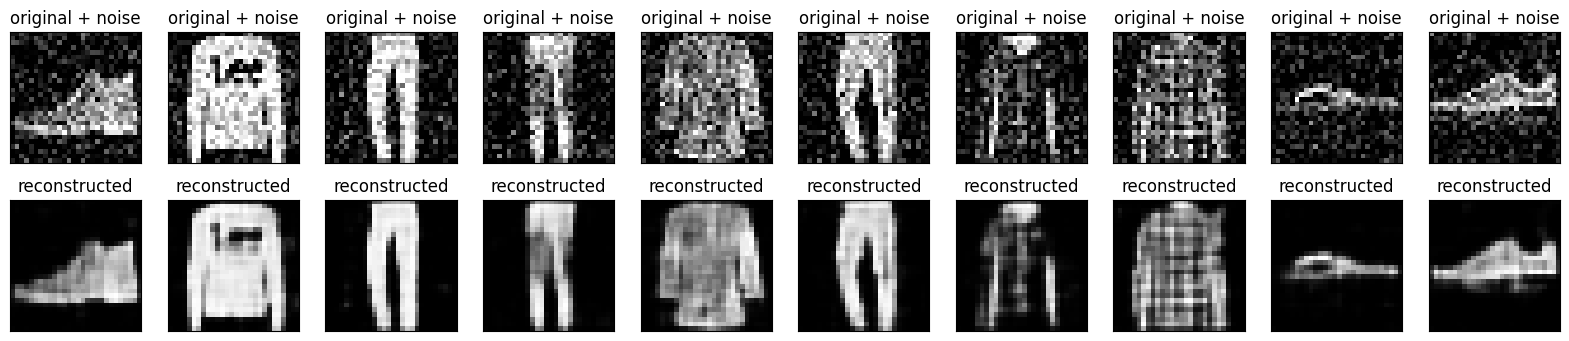

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

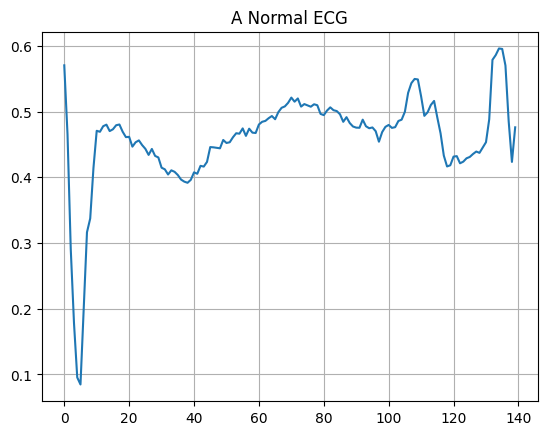

In [24]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

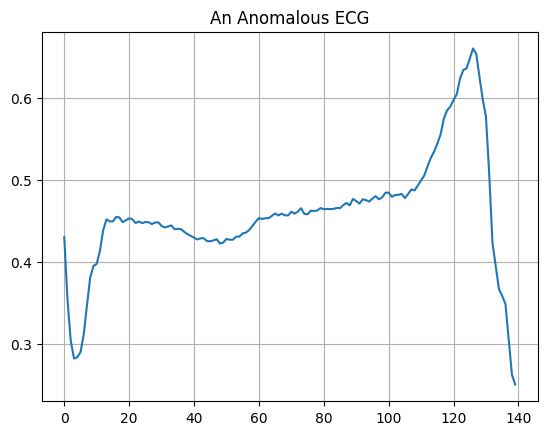

In [25]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [26]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [27]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [28]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20



1/5 [=====>........................] - ETA: 8s - loss: 0.0610


5/5 [==============================] - 2s 44ms/step - loss: 0.0591 - val_loss: 0.0535


Epoch 2/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0568


5/5 [==============================] - 0s 14ms/step - loss: 0.0563 - val_loss: 0.0519


Epoch 3/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0550


5/5 [==============================] - 0s 14ms/step - loss: 0.0540 - val_loss: 0.0500


Epoch 4/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0520


5/5 [==============================] - 0s 14ms/step - loss: 0.0506 - val_loss: 0.0482


Epoch 5/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0480


5/5 [==============================] - 0s 14ms/step - loss: 0.0465 - val_loss: 0.0468


Epoch 6/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0439


5/5 [==============================] - 0s 14ms/step - loss: 0.0423 - val_loss: 0.0450


Epoch 7/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0402


5/5 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.0424


Epoch 8/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0356


5/5 [==============================] - 0s 14ms/step - loss: 0.0345 - val_loss: 0.0404


Epoch 9/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0322


5/5 [==============================] - 0s 14ms/step - loss: 0.0315 - val_loss: 0.0391


Epoch 10/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0298


5/5 [==============================] - 0s 14ms/step - loss: 0.0292 - val_loss: 0.0379


Epoch 11/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0278


5/5 [==============================] - 0s 14ms/step - loss: 0.0275 - val_loss: 0.0373


Epoch 12/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0265


5/5 [==============================] - 0s 14ms/step - loss: 0.0263 - val_loss: 0.0366


Epoch 13/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0252


5/5 [==============================] - 0s 14ms/step - loss: 0.0253 - val_loss: 0.0359


Epoch 14/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0244


5/5 [==============================] - 0s 14ms/step - loss: 0.0244 - val_loss: 0.0353


Epoch 15/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0233


5/5 [==============================] - 0s 14ms/step - loss: 0.0236 - val_loss: 0.0346


Epoch 16/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0227


5/5 [==============================] - 0s 14ms/step - loss: 0.0230 - val_loss: 0.0341


Epoch 17/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0230


5/5 [==============================] - 0s 15ms/step - loss: 0.0224 - val_loss: 0.0337


Epoch 18/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0220


5/5 [==============================] - 0s 14ms/step - loss: 0.0219 - val_loss: 0.0333


Epoch 19/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0217


5/5 [==============================] - 0s 14ms/step - loss: 0.0213 - val_loss: 0.0333


Epoch 20/20



1/5 [=====>........................] - ETA: 0s - loss: 0.0205


5/5 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.0328


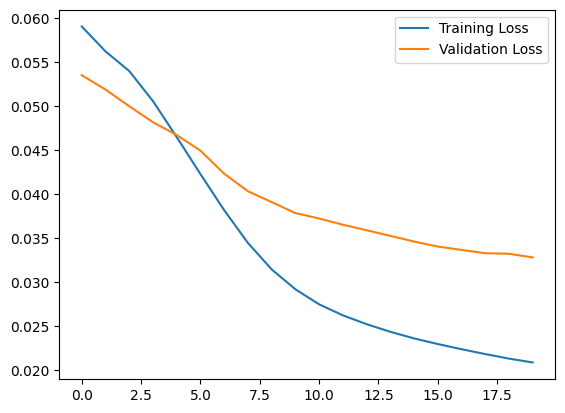

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

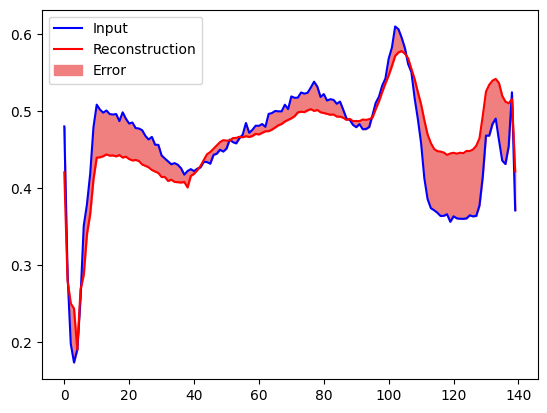

In [30]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

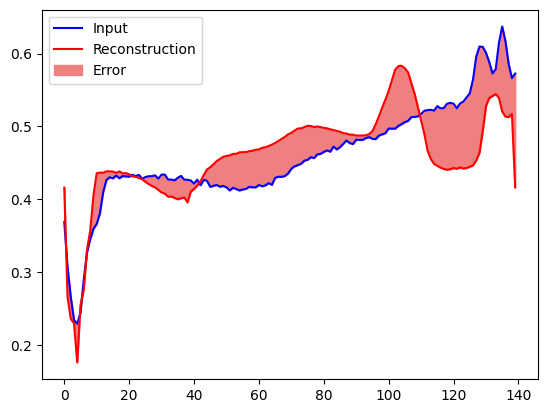

In [31]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set


 1/74 [..............................] - ETA: 8s


42/74 [================>.............] - ETA: 0s


74/74 [==============================] - 0s 1ms/step


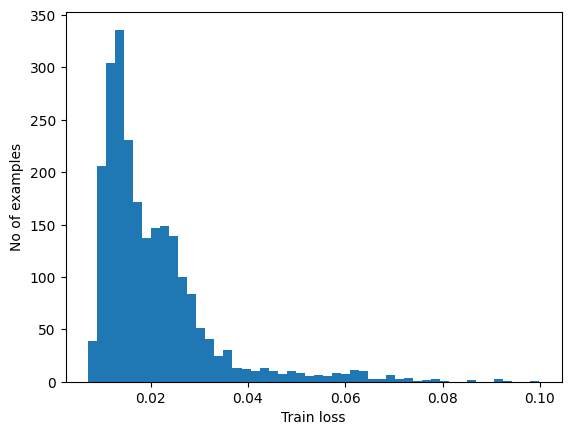

In [32]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [33]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.032631844


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 


 1/14 [=>............................] - ETA: 0s


14/14 [==============================] - 0s 1ms/step


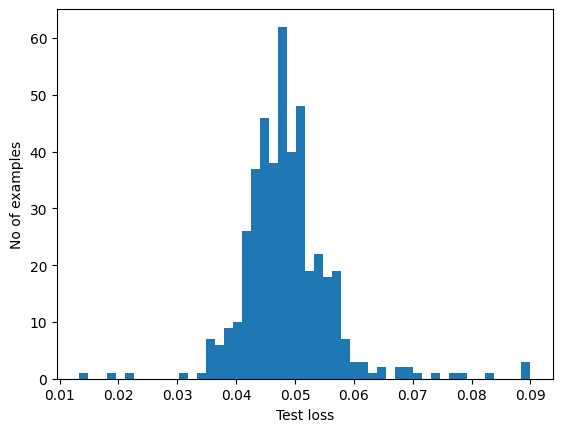

In [34]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.945
Precision = 0.9922027290448343
Recall = 0.9089285714285714
